This is a supplementary file for the tutorial this week and can be safely ignored
solutions will also be posted for this at the end of the week if you are interested
if you find any errors please notify me at omarghattas1991@gmail.com

Aim: We are going to explore three fundamental algorithms that are the basis for deep learning:
1. the Perceptron training rule
2. Gradient Descent
3. Stochastic Gradient Descent

At the end of this lab you should be comfortable with perceptron training and the basics of 
gradient descent -> be able to start thinking about neural networks and building them from scratch 


In [46]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(43)
%matplotlib inline

## Helper Functions

In [48]:
def plot_scatter(X, y, w):
    pos_points = X[np.where(y==1)[0]]
    neg_points = X[np.where(y==-1)[0]]
    plt.scatter(pos_points[:, 1], pos_points[:, 2], color='blue')
    plt.scatter(neg_points[:, 1], neg_points[:, 2], color='red')
    xx = np.linspace(-6,6)
    yy = -w[0]/w[2] - w[1]/w[2] * xx
    plt.plot(xx, yy, color='orange')
    
    ratio = (w[2]/w[1] + w[1]/w[2])
    xpt = (-1*w[0] / w[2]) * 1/ratio
    ypt = (-1*w[0] / w[1]) * 1/ratio
    
    plt.axes().arrow(xpt, ypt, w[1], w[2], head_width=0.2, color='orange')
    plt.axis('equal')
    plt.show()
    
#plot_scatter(X, y, w=np.array([0,-1,3]))

In [50]:
def generate_data(n=20):
    dist_01 = np.random.multivariate_normal(np.array([2,2]), np.array([[1,0.9],[0.5,1]]), n)
    dist_02 = np.random.multivariate_normal(np.array([-2,-2]),np.array([[1,0],[0.3,1]]), n)
    X = np.concatenate((np.ones(2*n).reshape(-1,1), np.concatenate((dist_01, dist_02))), axis=1)
    y = np.concatenate((np.ones(n), -1*np.ones(n)))
    shuffle_idx = np.random.choice(2*n, size=2*n, replace=False)
    X = X[shuffle_idx]
    y = y[shuffle_idx]
    return X, y

## Perceptron Training Rule

In [52]:
def train_perceptron(X, y, eta=1):
    w = np.random.random(3) #np.array([-2,-1,3])
    nmb_data = X.shape[0]
    nmb_its = 0
    counter = 0
    while True:
        for i in range(nmb_data):
            nmb_its+=1
            if (y[i] * (w.T @ X[i]) < 0):
                w = w + eta * y[i] * X[i]
                plot_scatter(X, y, w)
                counter = 0
                print(f"Iteration {nmb_its}: w = {w}")
            counter += 1

            if(counter>nmb_data):
                plot_scatter(X, y, w)
                print(f"Converged after {nmb_its} iterations")
                return    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


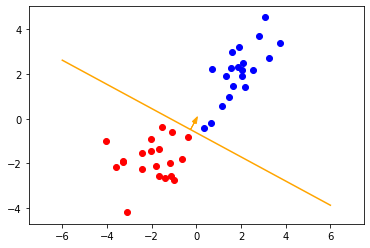

Iteration 3: w = [0.19396347 0.16858356 0.3116276 ]


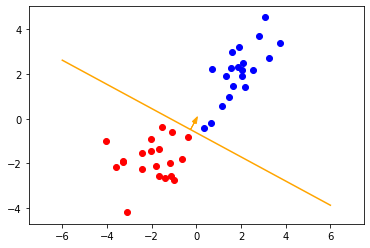

Converged after 43 iterations


In [54]:
X, y = generate_data()
train_perceptron(X, y, eta=0.1)

## Gradient Descent

In [56]:
def sigmoid(x,a=1):
    return 1 / (1 + np.exp(-a*x))

def grad_sigmoid(x, a=1):
    return sigmoid(x,a)*(1 - sigmoid(x,a))

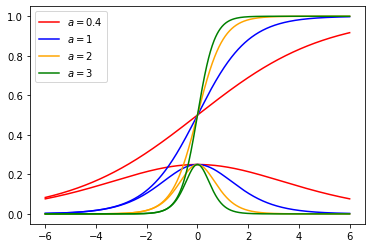

In [58]:
# plot sig functions 
xx = np.linspace(-6,6,1000)
a_vals = [0.4,1,2,3]
cols = ['red', 'blue', 'orange', 'green']
y_sig = [sigmoid(xx, a_val) for a_val in a_vals]
y_grad_sig = [grad_sigmoid(xx, a_val) for a_val in a_vals]

for i in range(len(a_vals)):
    label = str(a_vals[i])
    plt.plot(xx, y_sig[i], label=rf'$a={label}$', color=cols[i])
    plt.plot(xx, y_grad_sig[i], color=cols[i])
plt.legend()
plt.show()

In [60]:
def loss_i(w, x_i, y_i):
    '''squared loss for i-th data point'''
    return (y_i - sigmoid(w@x_i))**2
    
def grad_loss_i(w, x_i, y_i):
    '''grad loss for i-th data point'''
    return (y_i - sigmoid(w@x_i)) * (-x_i) * grad_sigmoid(w@x_i)

def gradient_descent(X, y, eta, T):
    # T is the number of updates -> how many times to loop through the ENTIRE dataset
    nmb_data = X.shape[0]
    w = np.array([-2,-1,-3])
    for t in range(T):
        loss = 0
        grad_loss = 0
        for i in range(nmb_data):
            loss += loss_i(w, X[i], y[i])
            grad_loss += grad_loss_i(w, X[i], y[i])
        loss *= 0.5
        print(f"loss = {loss}")
        w = w - eta * grad_loss
        plot_scatter(X,y,w)

loss = 122.59156878691638


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


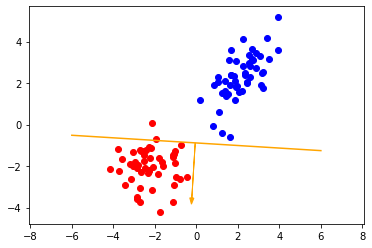

loss = 114.85489931336328


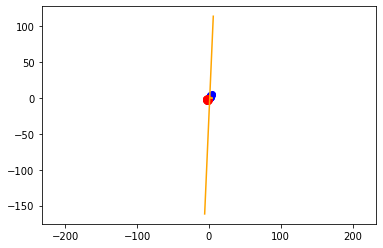

loss = 26.757343419031706


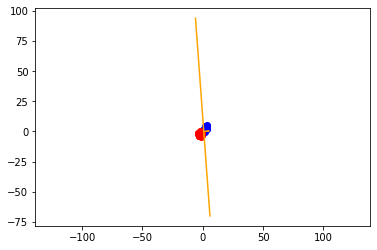

loss = 25.79117095447476


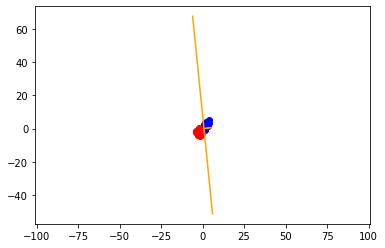

loss = 25.65375919051042


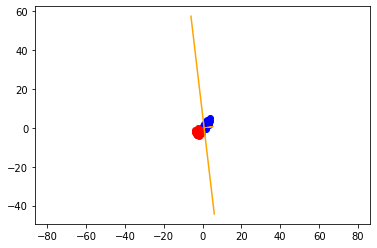

loss = 25.577871078722257


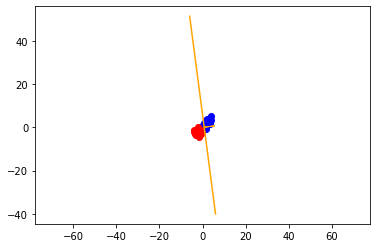

loss = 25.524059182945315


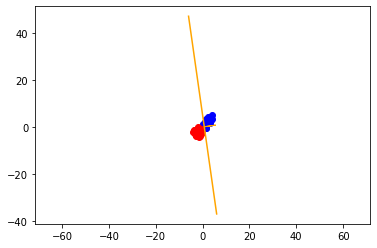

loss = 25.480897328534468


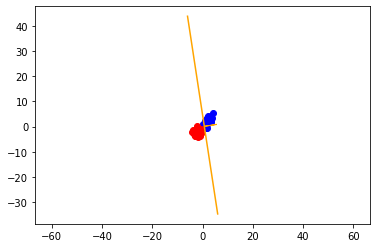

loss = 25.443663443192257


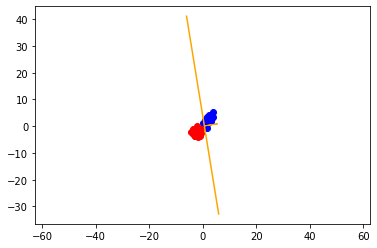

loss = 25.41000874828915


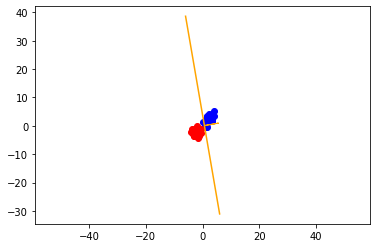

loss = 25.378649756264064


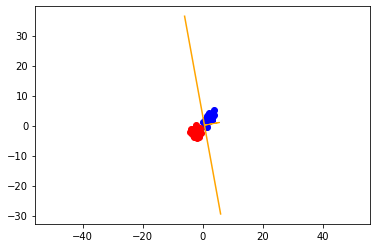

loss = 25.34887583500635


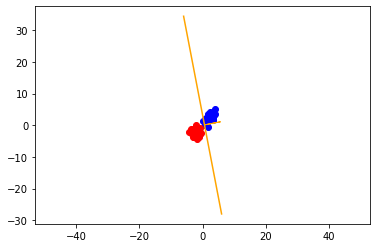

loss = 25.32033224890479


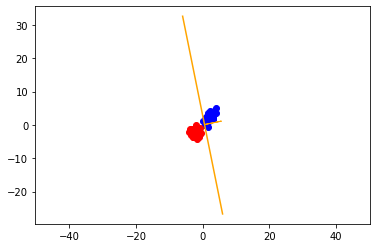

loss = 25.292906681975293


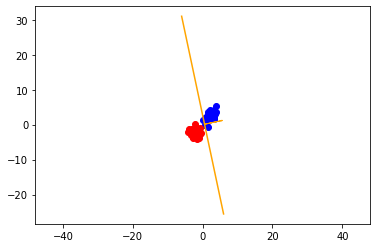

loss = 25.26665369954975


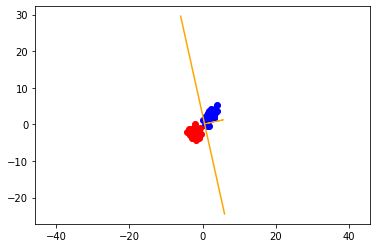

loss = 25.241730720912702


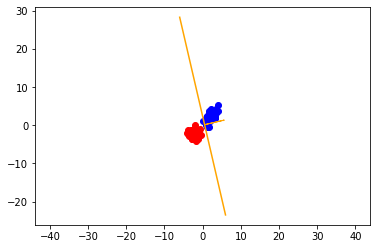

loss = 25.21833779124217


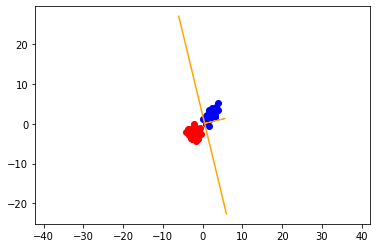

loss = 25.19666374821991


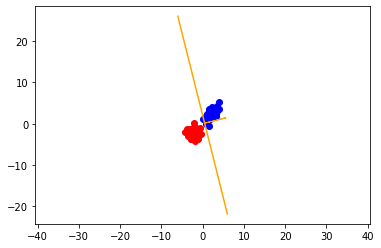

loss = 25.17684548854531


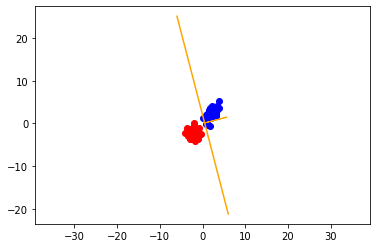

loss = 25.158945614976354


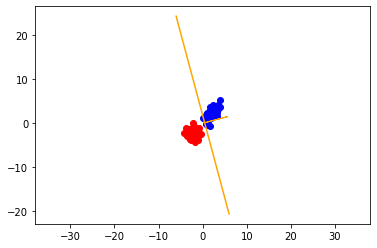

loss = 25.142948944723386


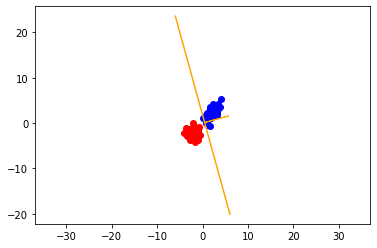

loss = 25.128773509146598


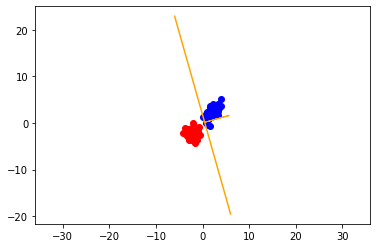

loss = 25.116289269778783


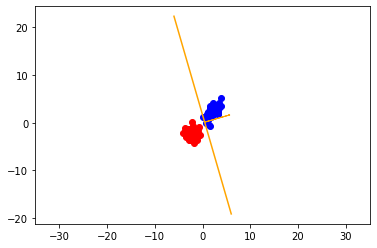

loss = 25.105338235062227


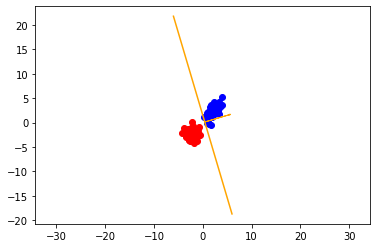

loss = 25.09575181104431


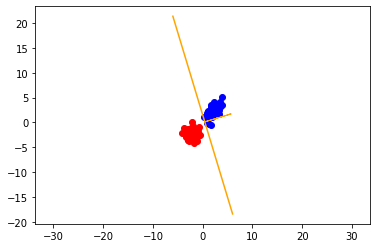

In [62]:
X, y = generate_data(50)
gradient_descent(X, y, 0.3, 25)

## Stochastic Gradient Descent

In [64]:
25%25==0

True

In [66]:
def stochastic_gradient_descent(X, y, eta, T=5):
    nmb_data = X.shape[0]
    w = np.array([-2,-1,-3])
    for t in range(T):
        loss = 0
        grad_loss = 0
        for i in range(nmb_data):
            loss += loss_i(w, X[i], y[i])
            grad_loss += grad_loss_i(w, X[i], y[i])
            plot_scatter(X,y,w)
        loss *= 0.5
        print(f"loss = {loss}")
        w = w - eta * grad_loss
        plot_scatter(X,y,w)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


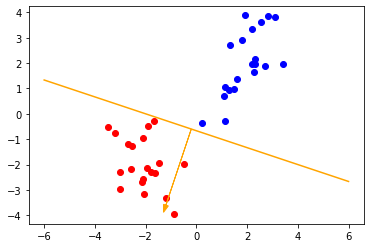

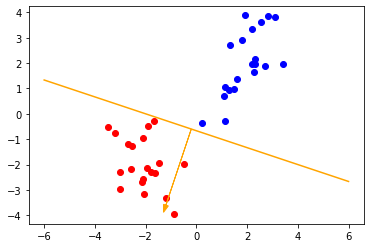

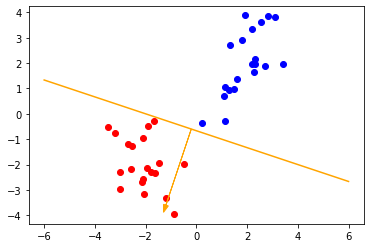

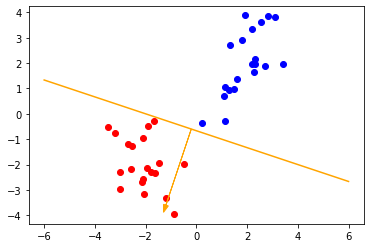

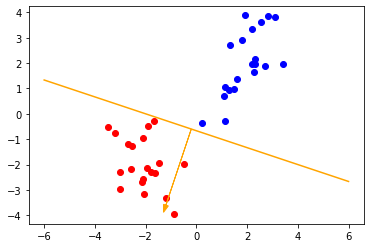

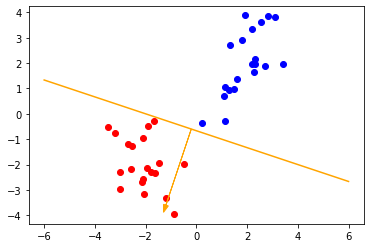

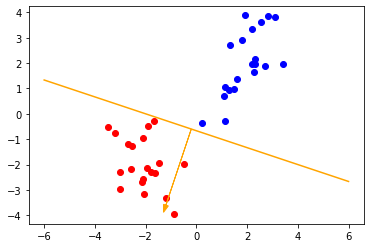

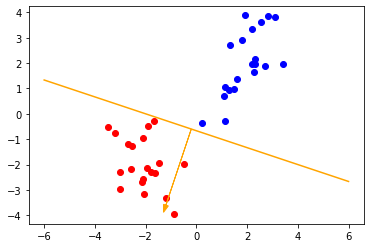

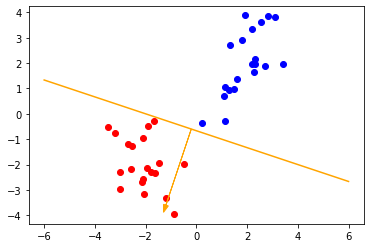

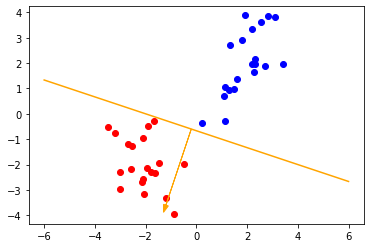

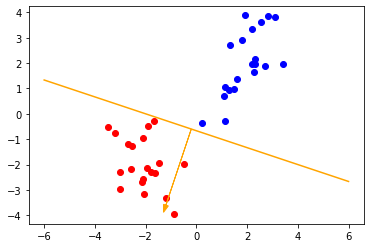

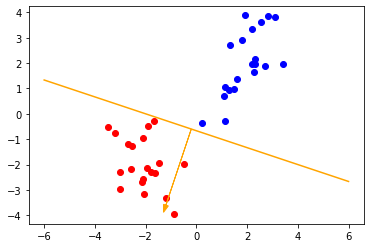

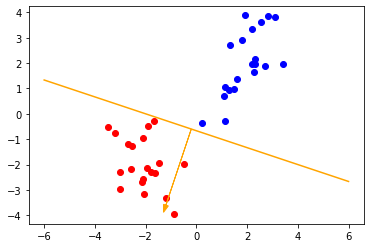

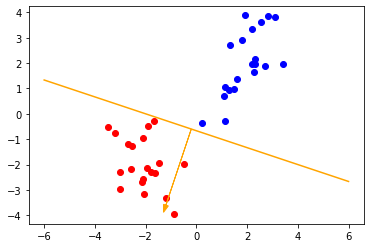

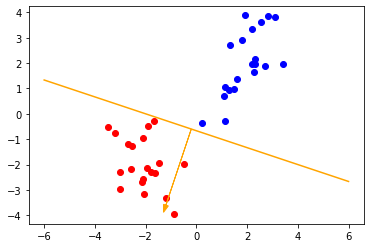

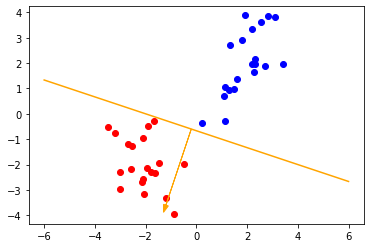

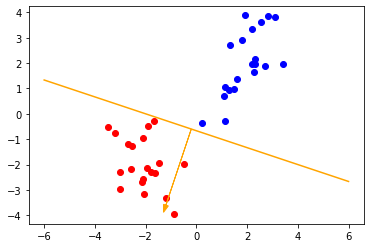

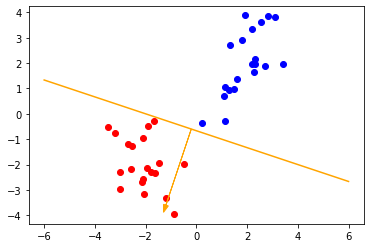

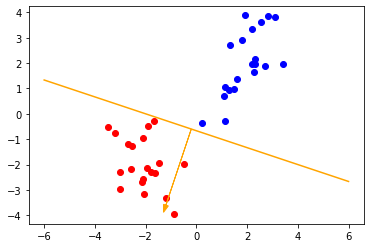

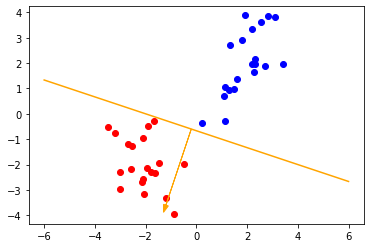

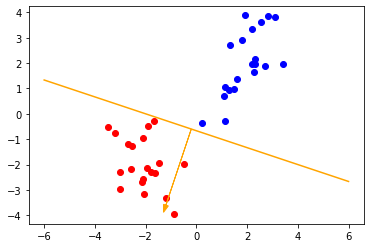

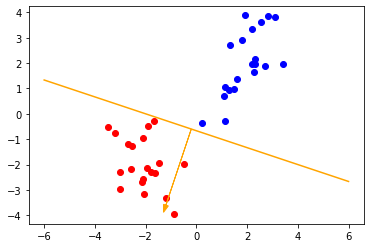

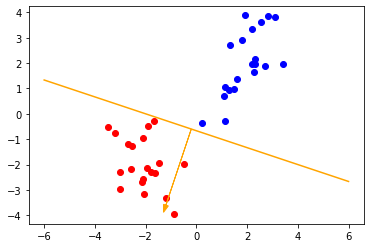

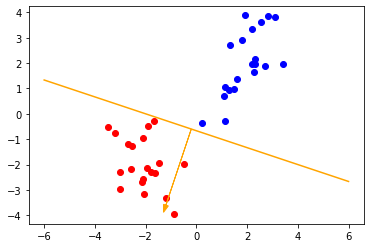

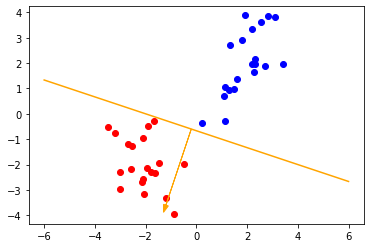

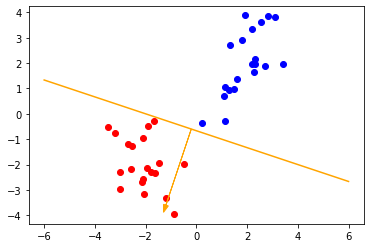

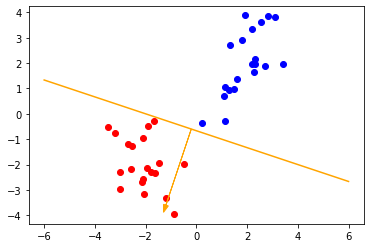

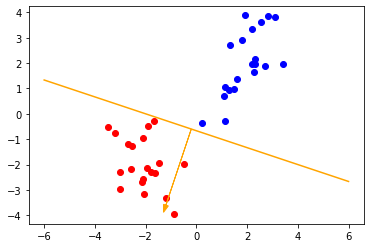

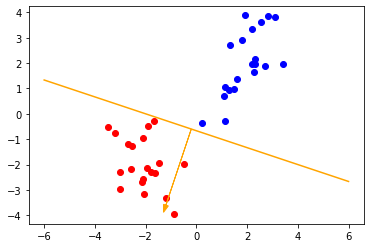

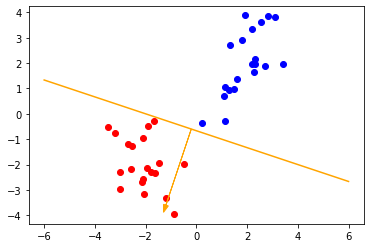

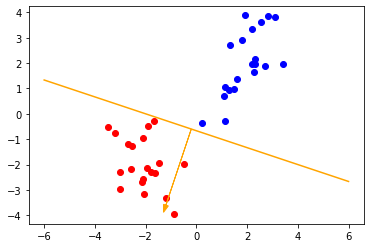

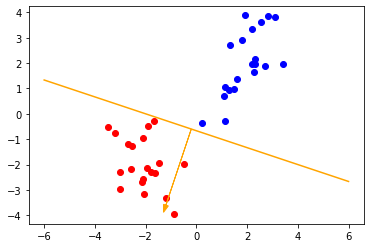

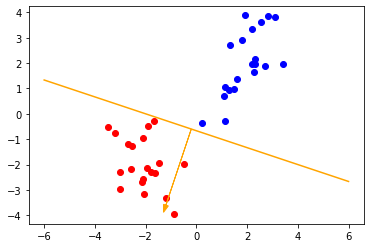

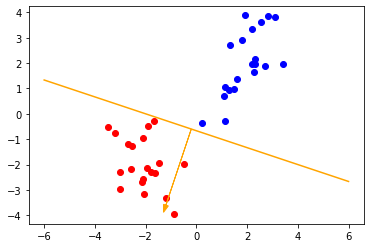

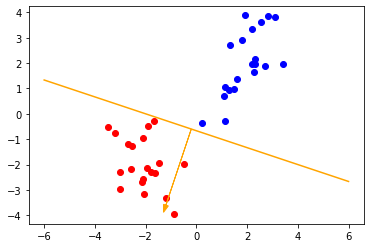

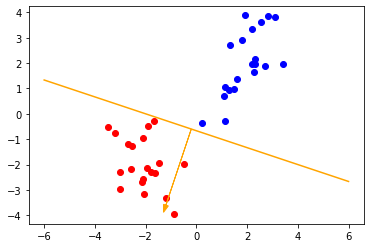

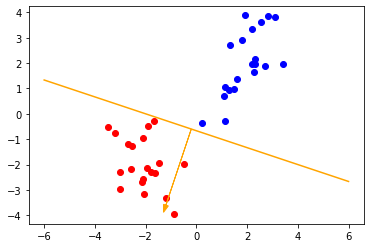

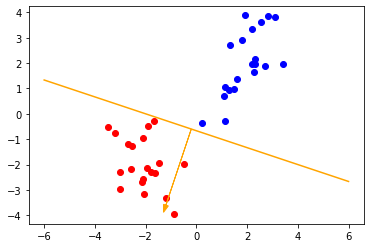

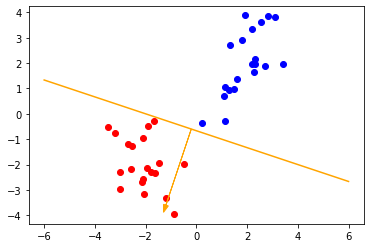

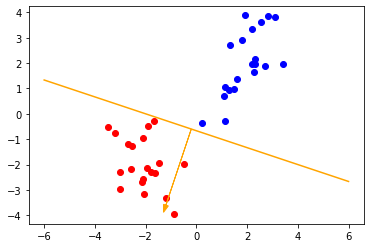

loss = 48.312322625555225


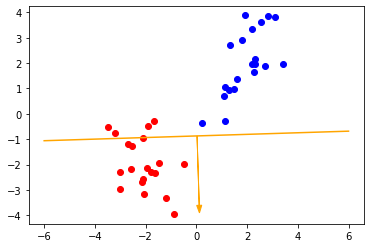

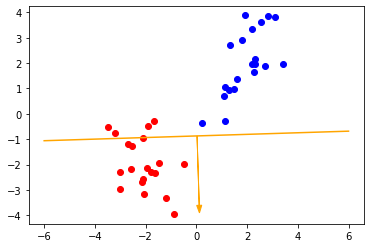

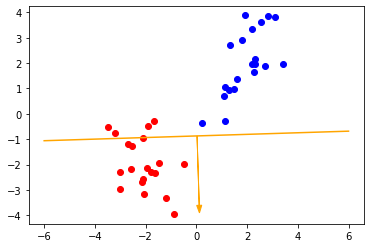

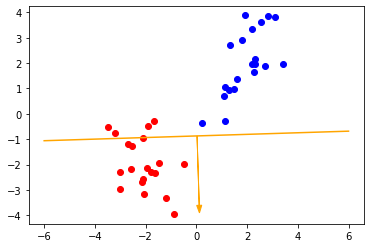

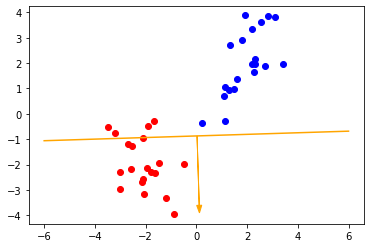

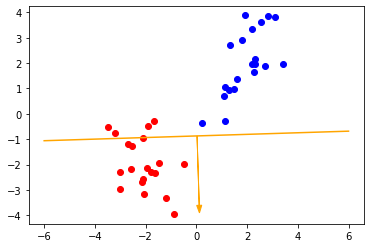

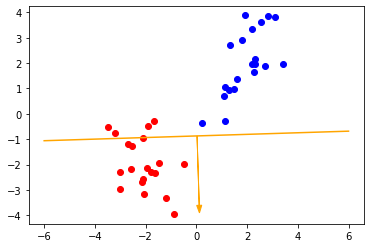

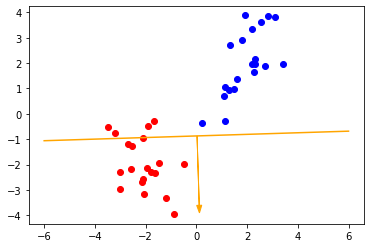

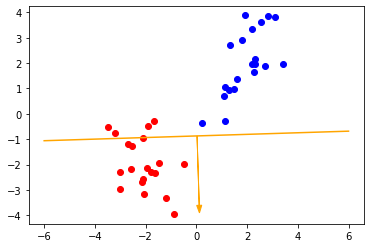

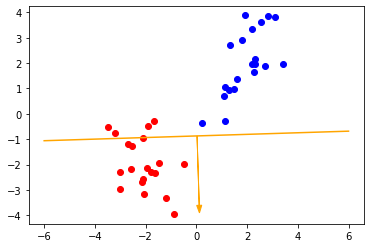

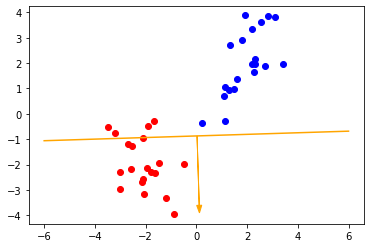

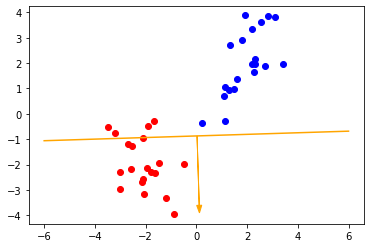

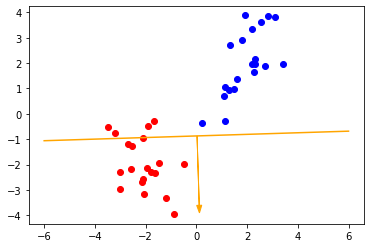

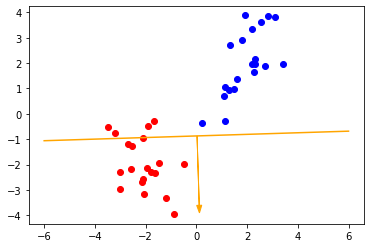

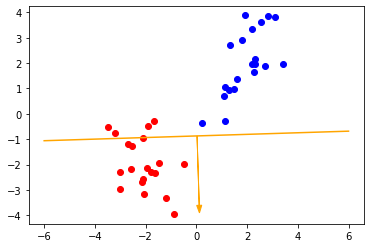

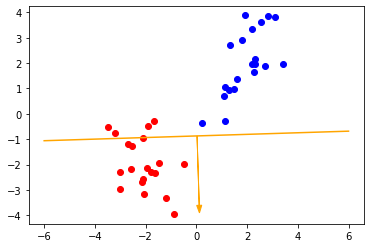

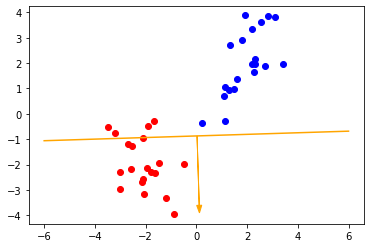

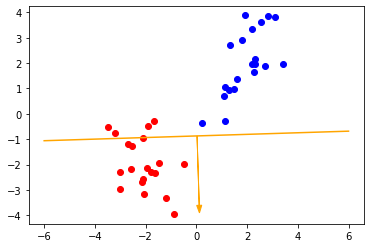

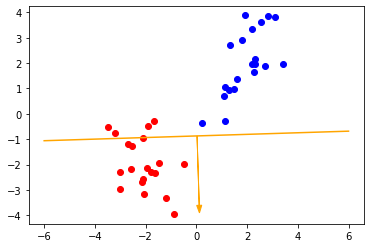

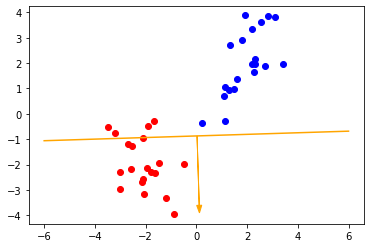

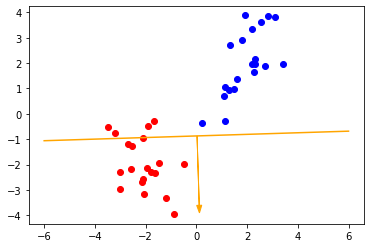

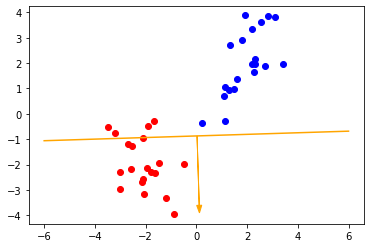

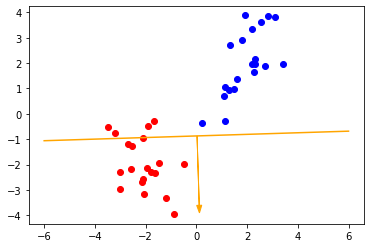

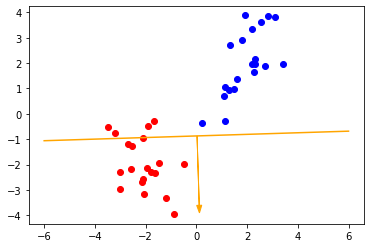

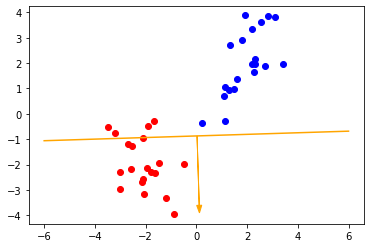

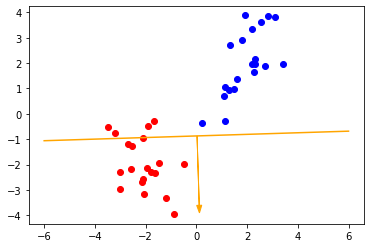

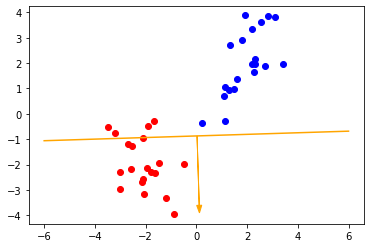

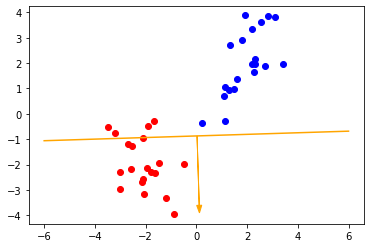

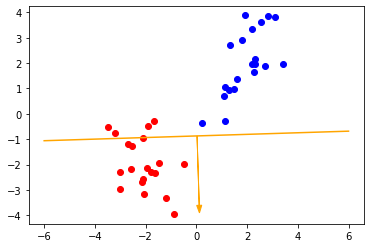

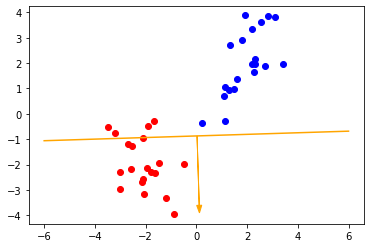

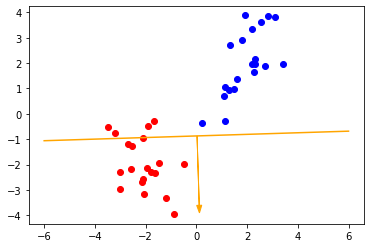

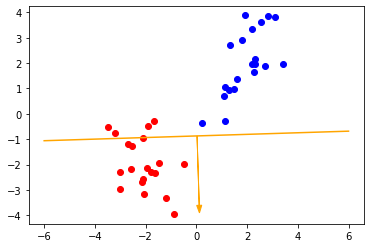

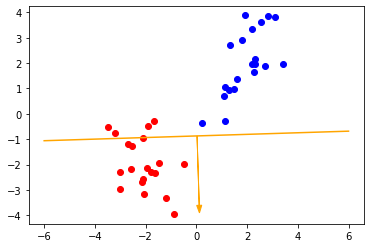

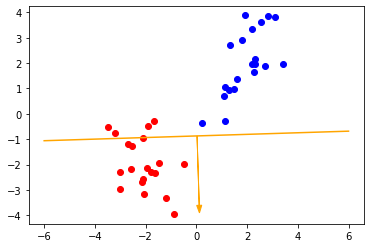

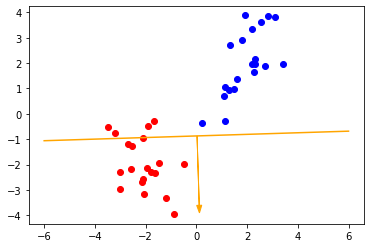

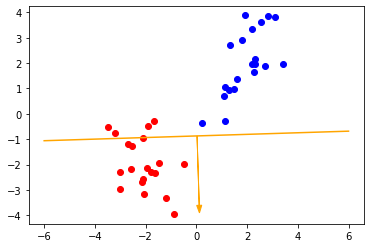

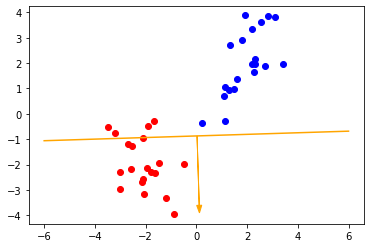

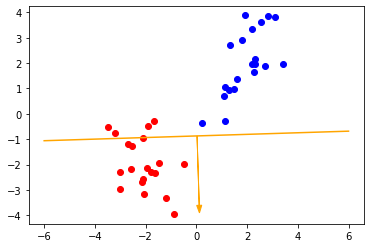

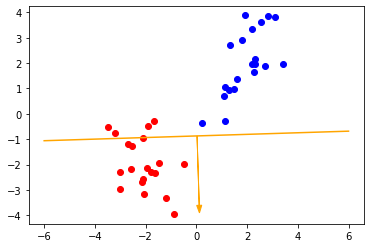

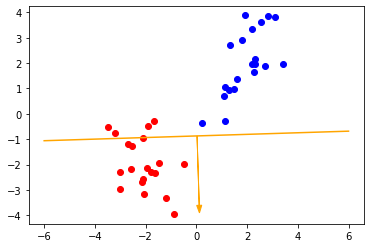

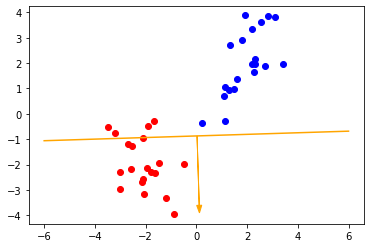

loss = 42.110053764054804


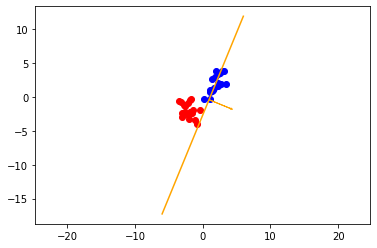

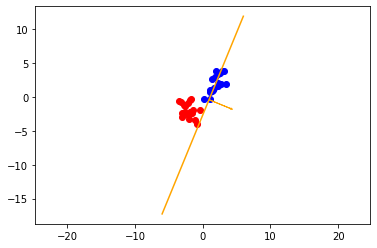

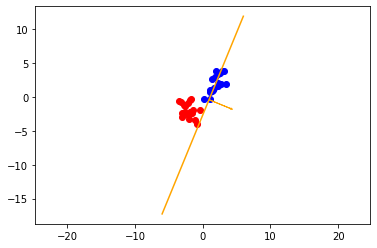

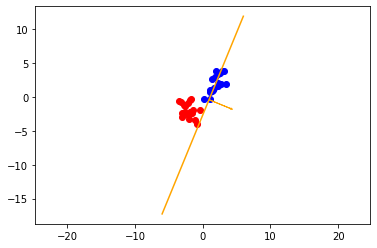

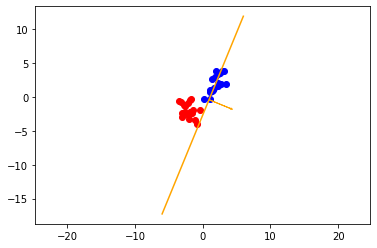

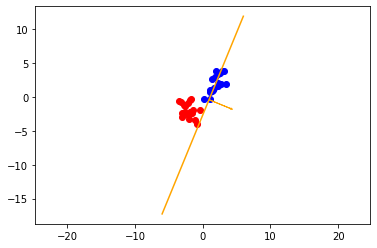

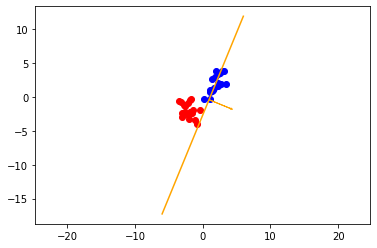

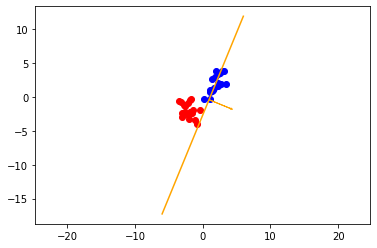

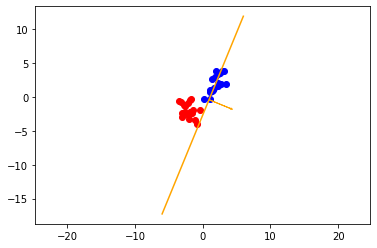

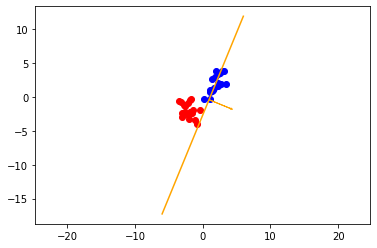

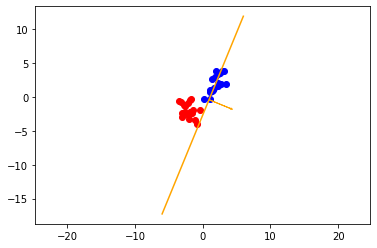

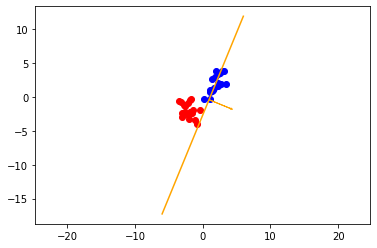

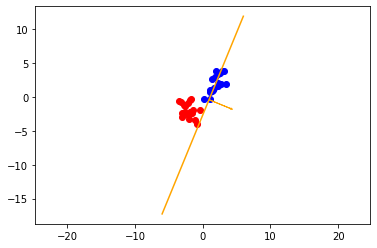

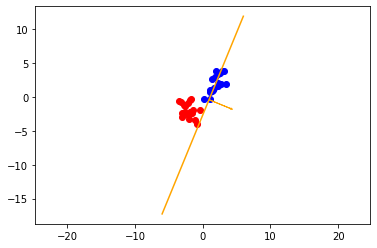

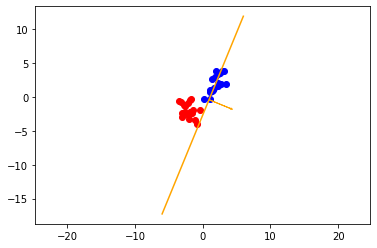

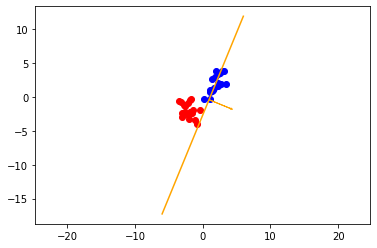

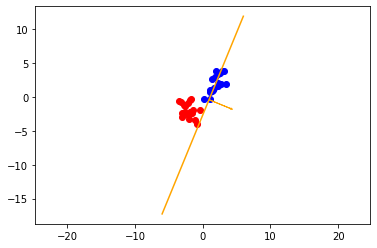

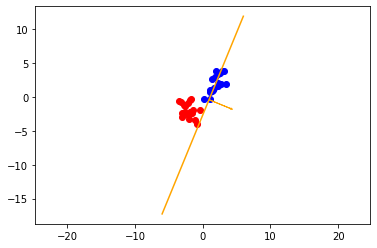

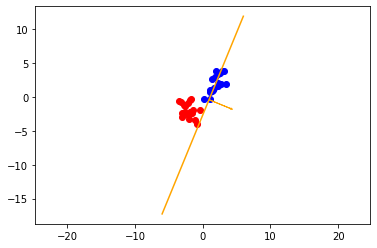

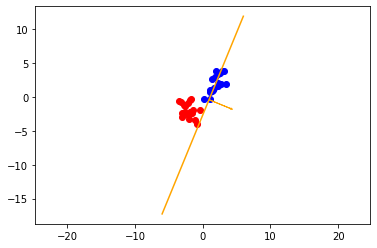

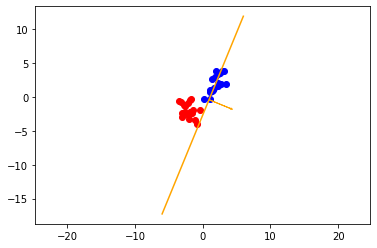

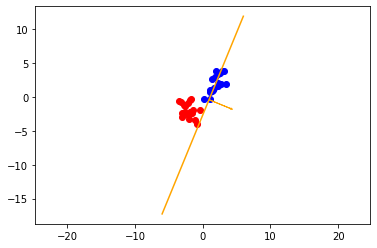

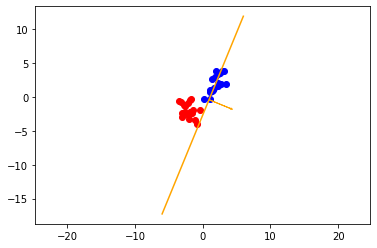

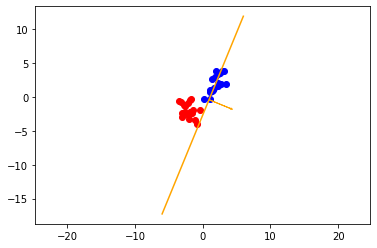

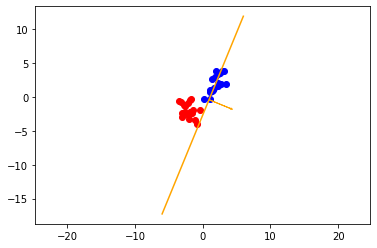

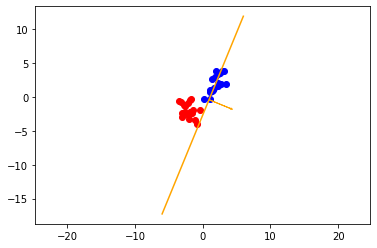

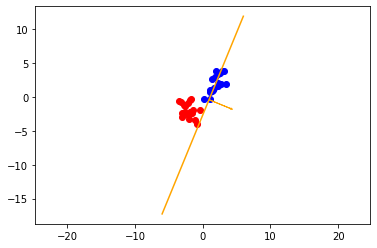

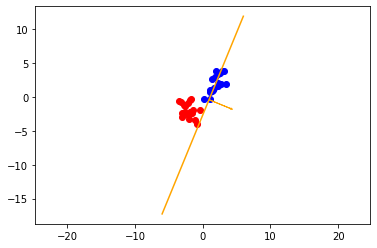

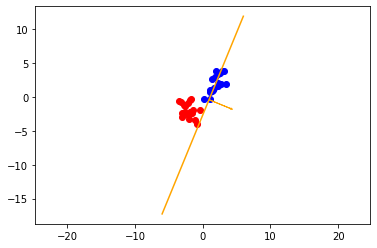

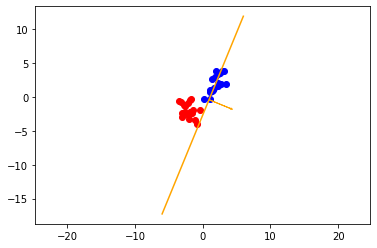

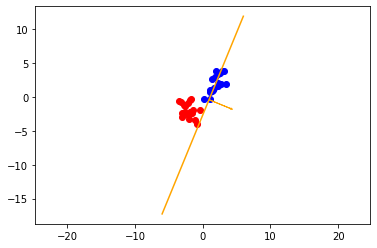

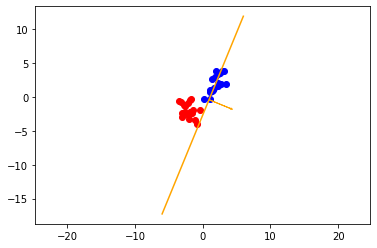

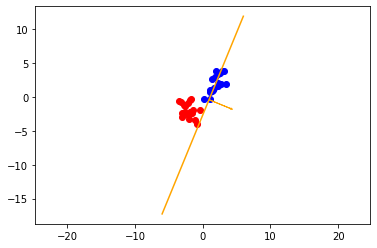

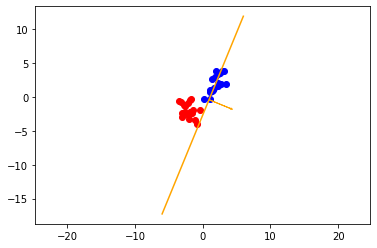

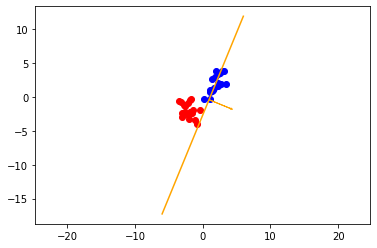

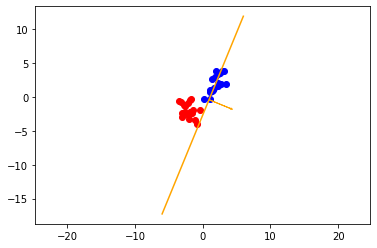

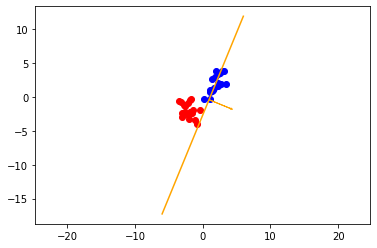

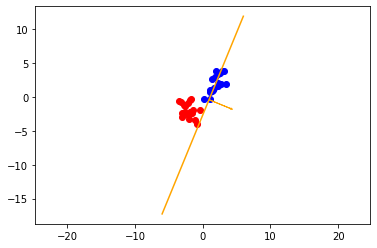

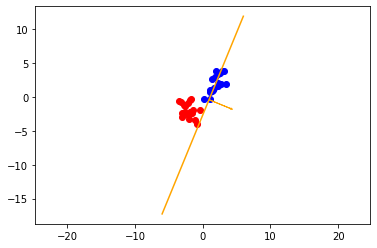

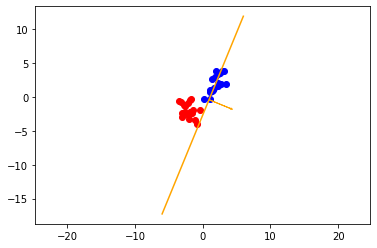

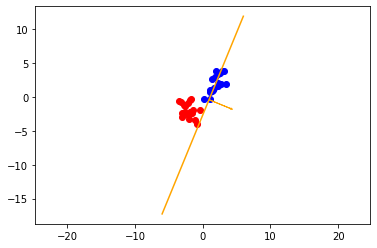

loss = 13.750880496898308


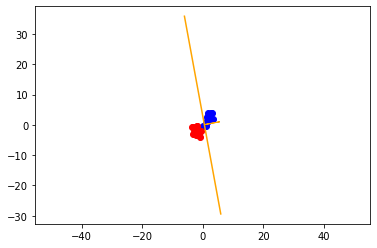

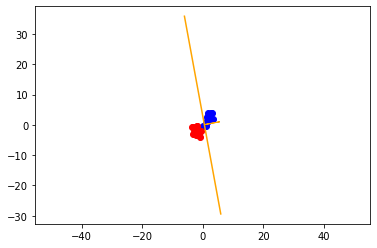

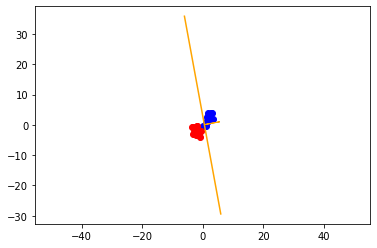

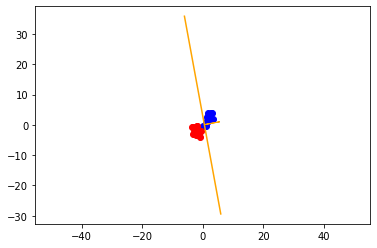

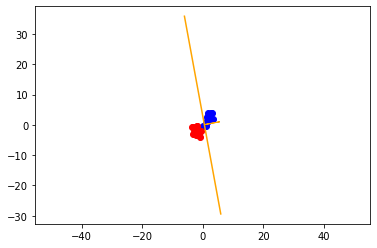

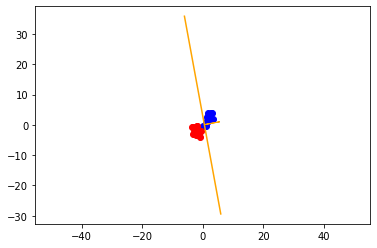

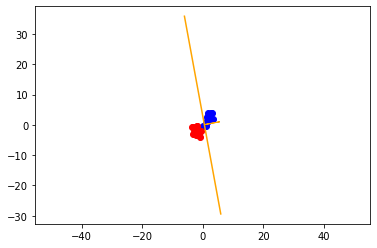

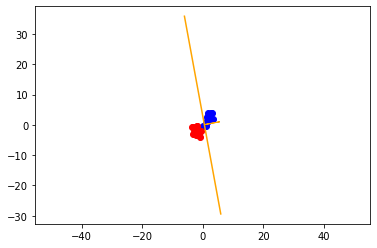

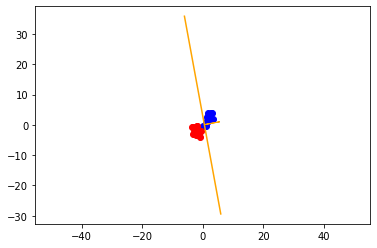

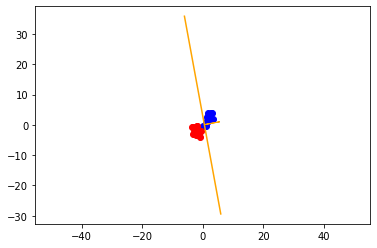

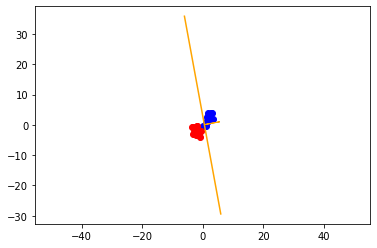

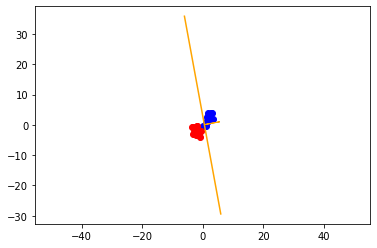

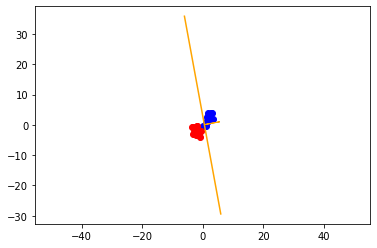

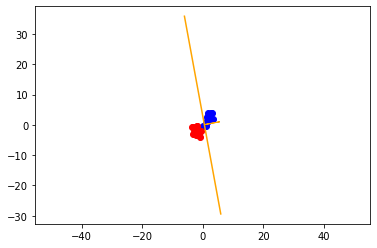

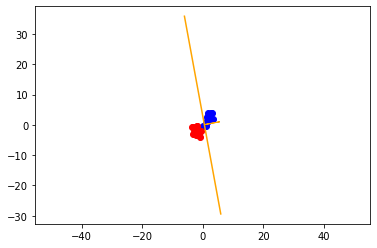

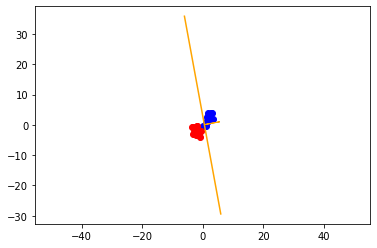

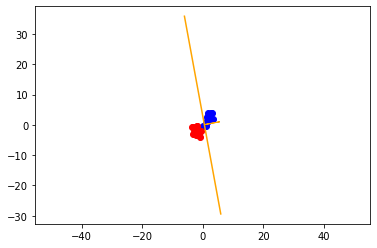

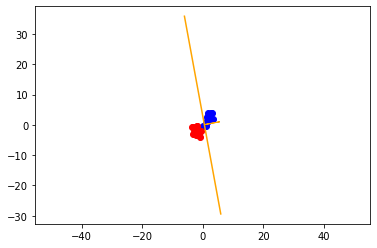

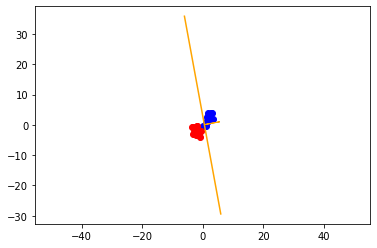

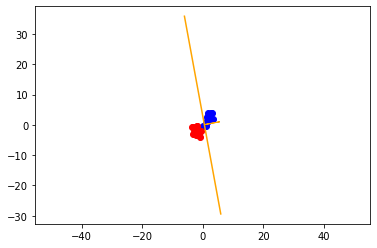

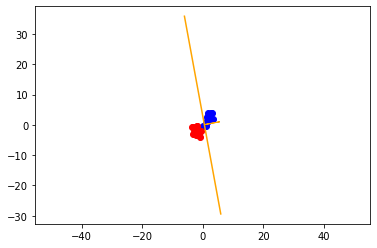

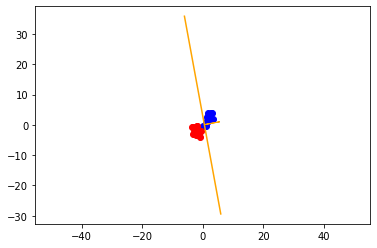

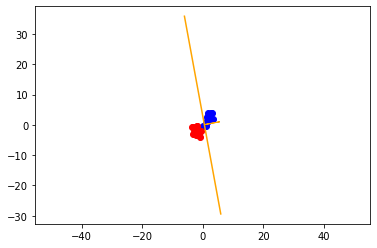

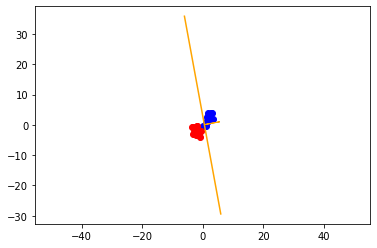

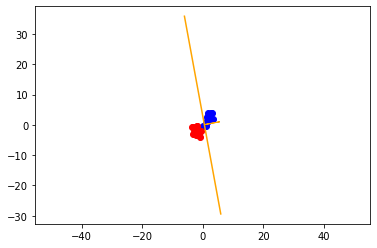

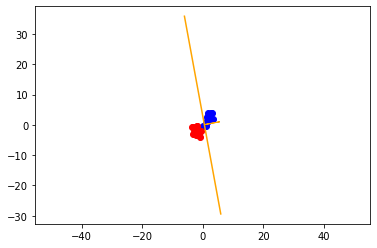

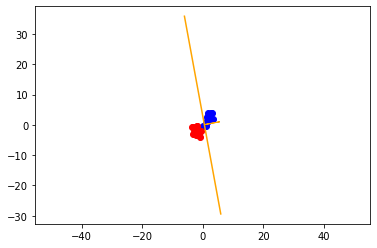

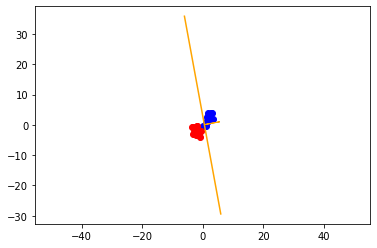

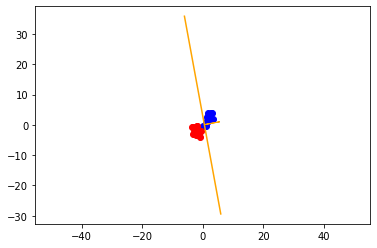

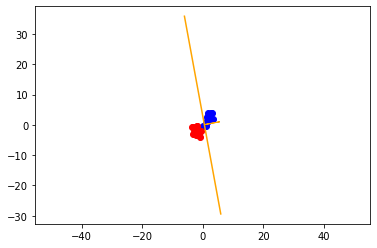

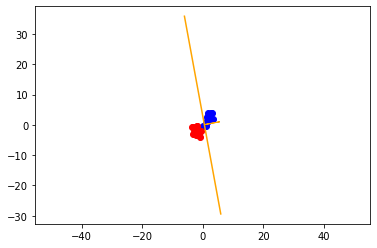

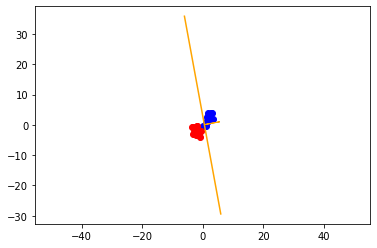

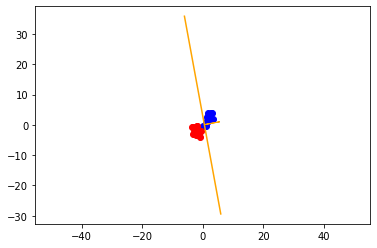

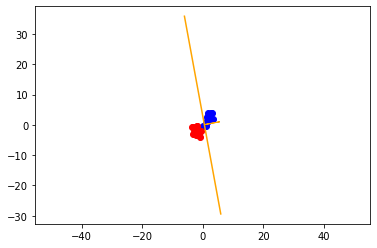

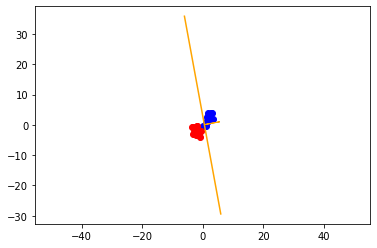

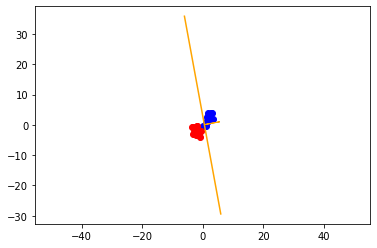

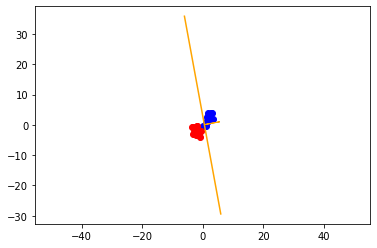

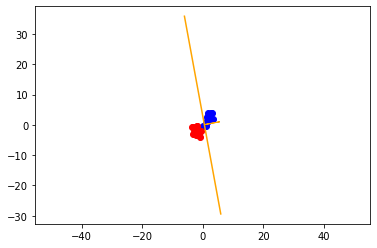

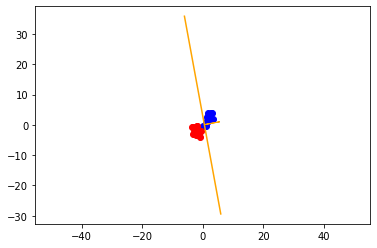

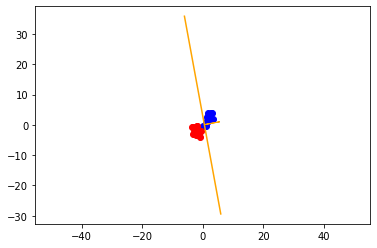

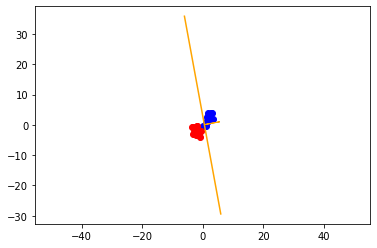

loss = 10.40782431428181


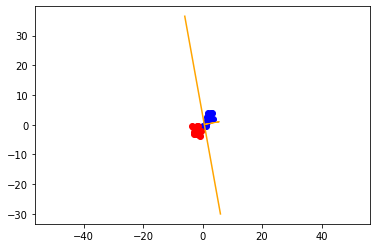

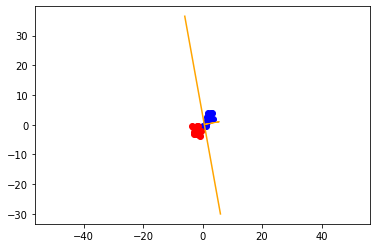

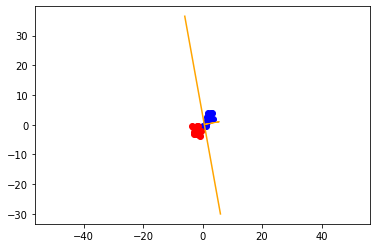

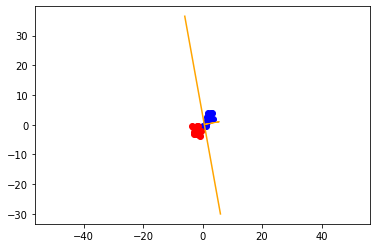

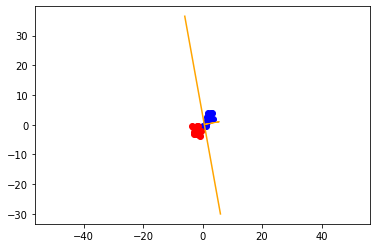

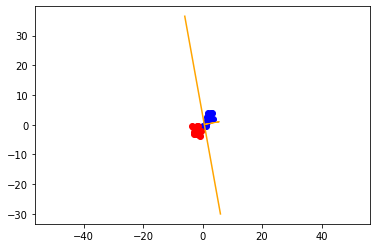

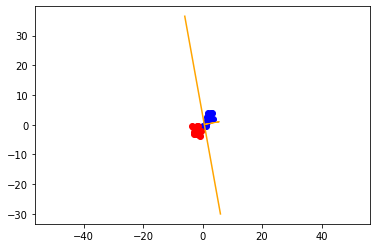

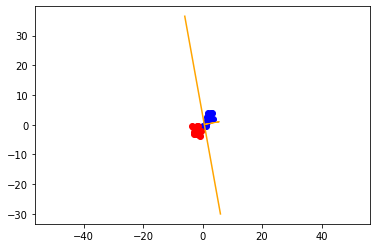

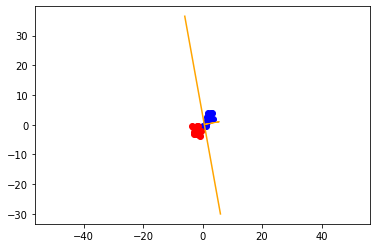

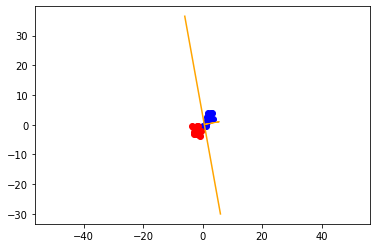

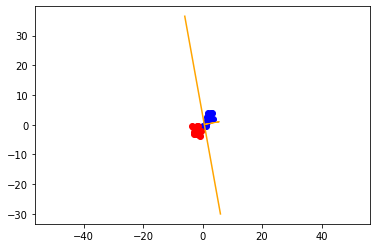

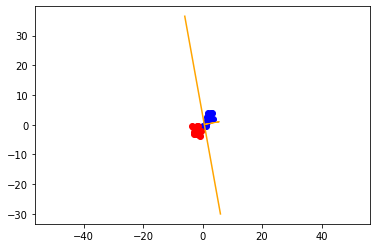

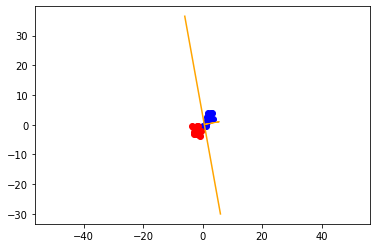

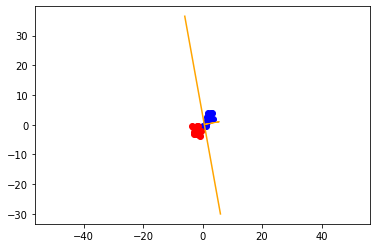

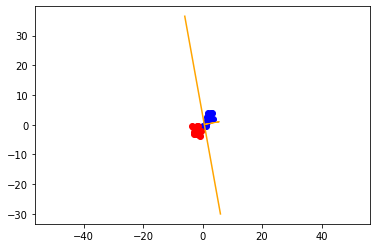

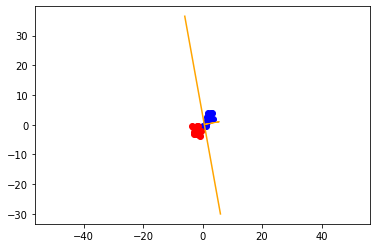

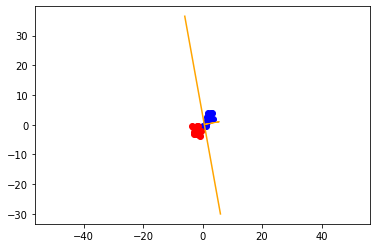

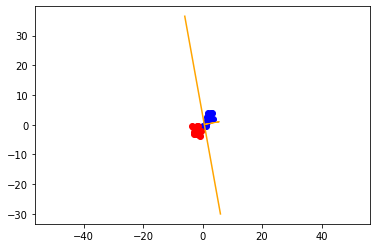

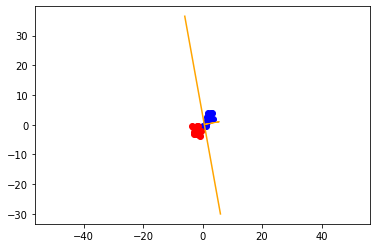

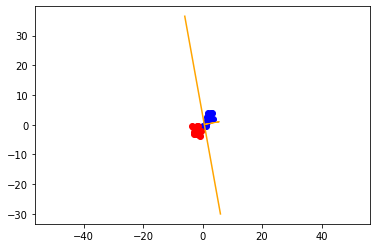

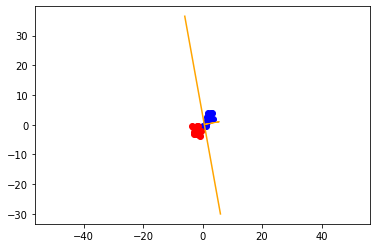

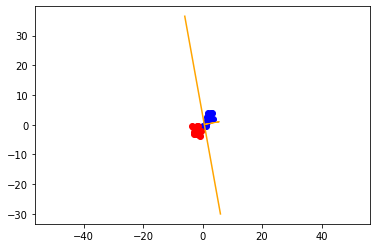

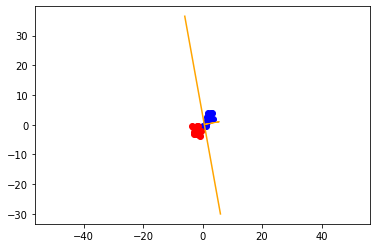

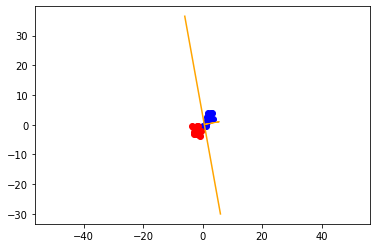

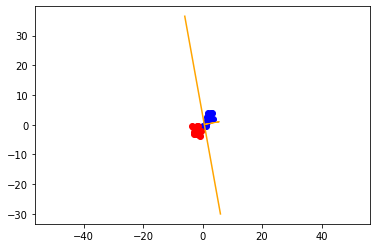

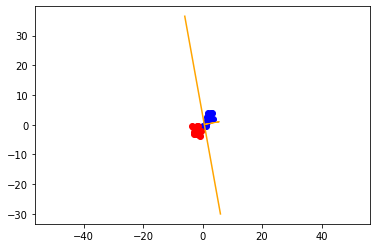

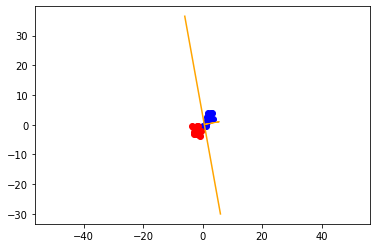

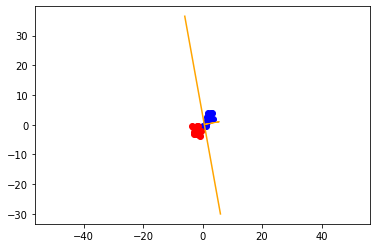

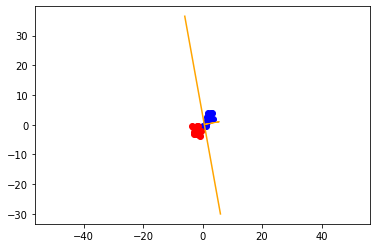

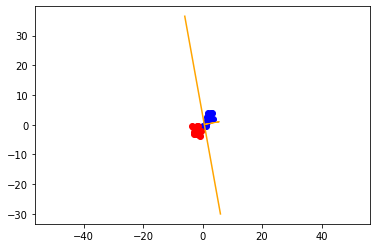

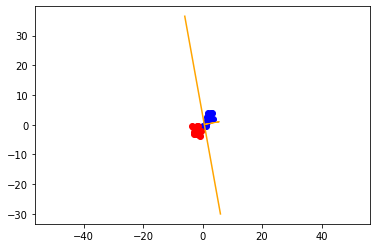

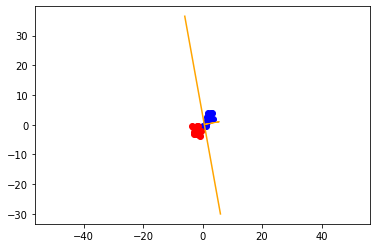

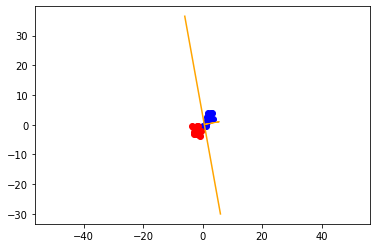

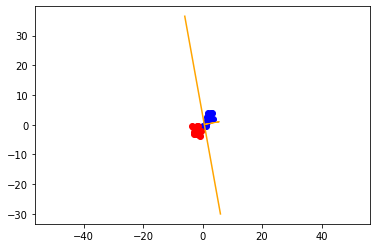

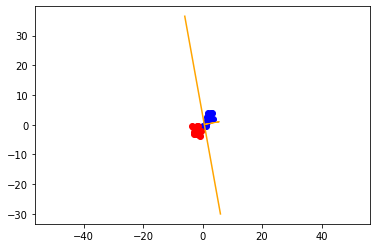

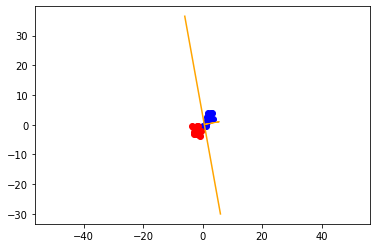

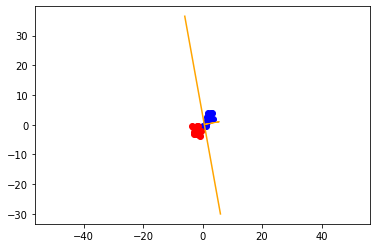

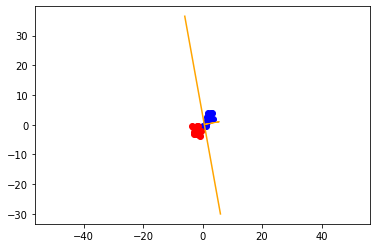

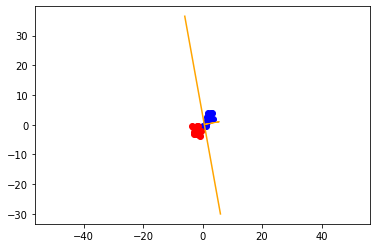

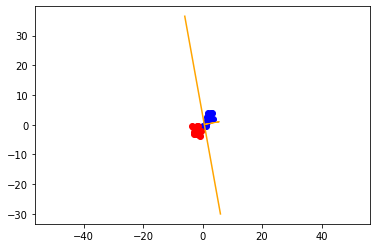

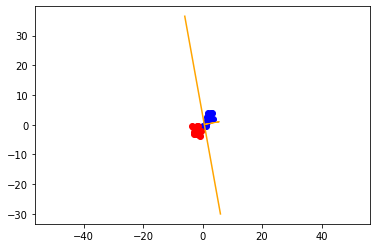

loss = 10.402633697570995


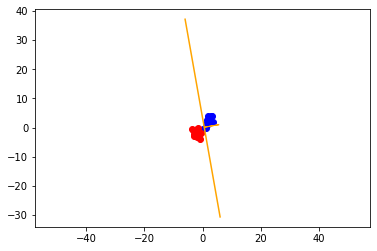

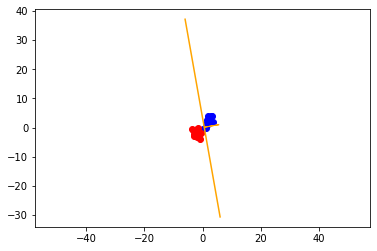

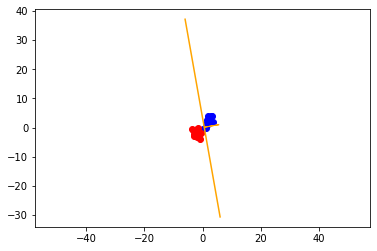

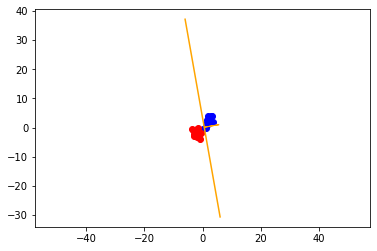

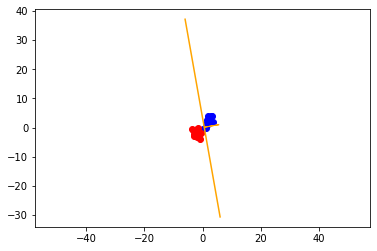

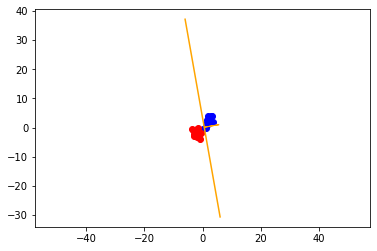

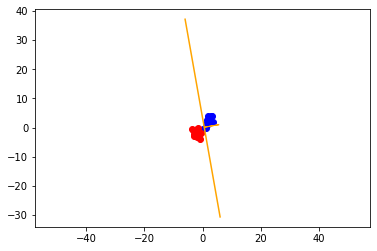

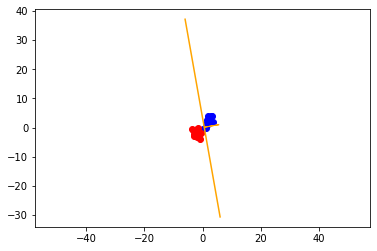

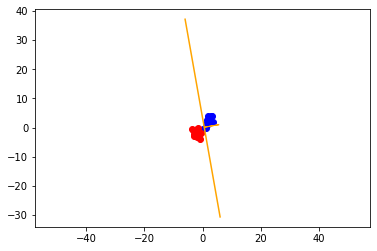

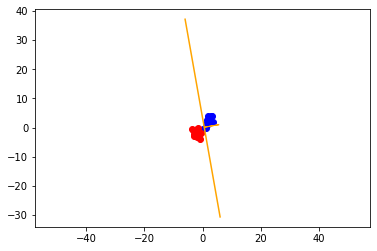

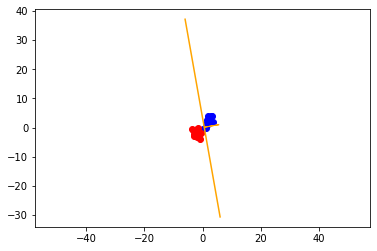

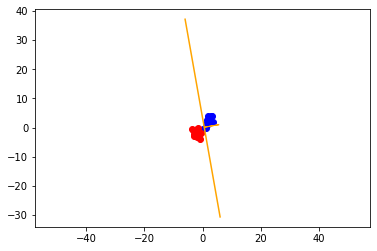

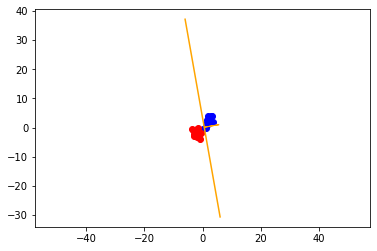

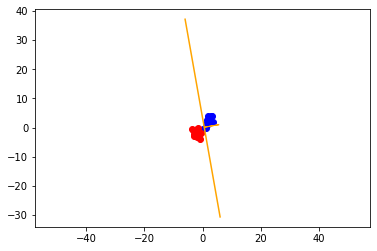

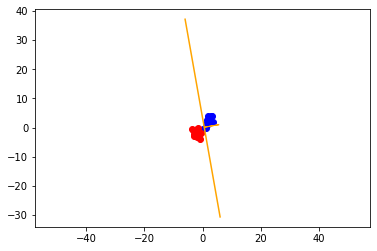

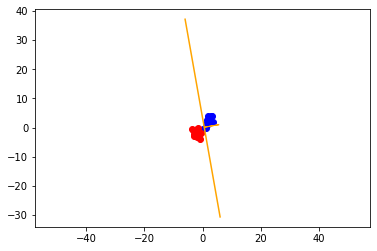

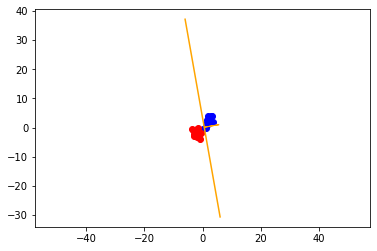

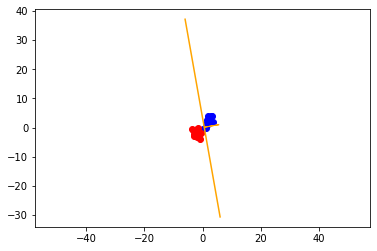

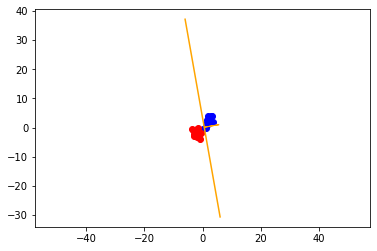

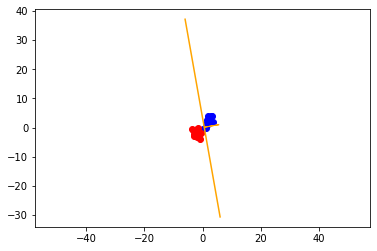

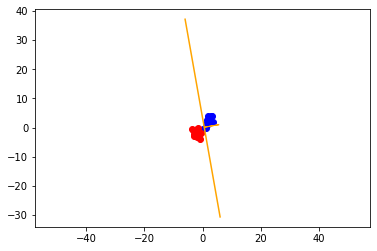

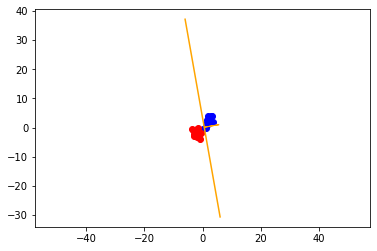

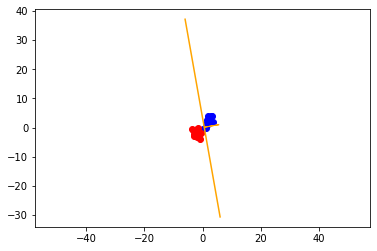

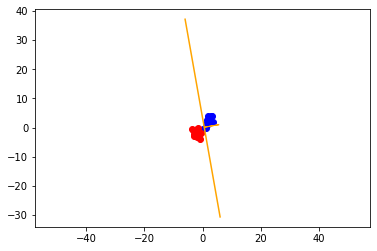

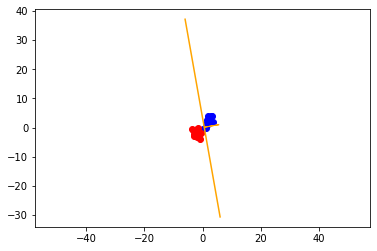

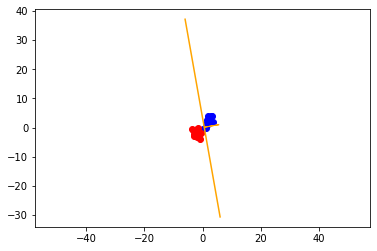

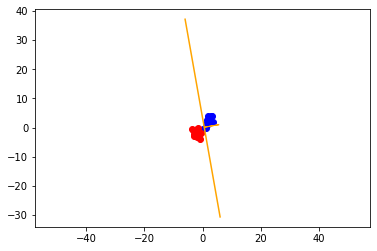

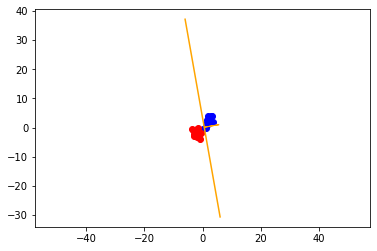

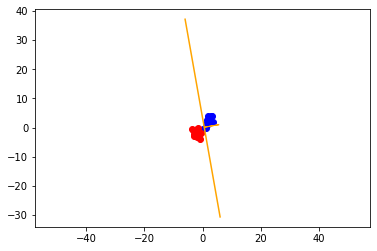

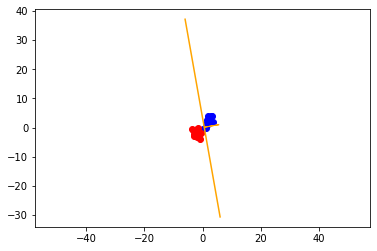

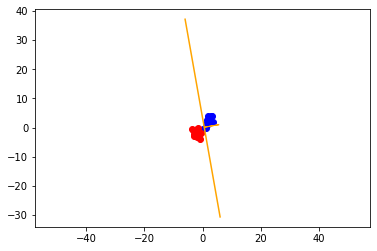

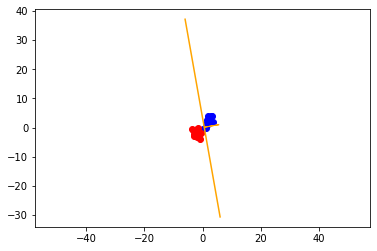

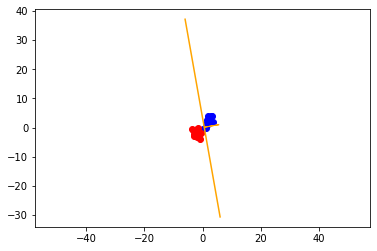

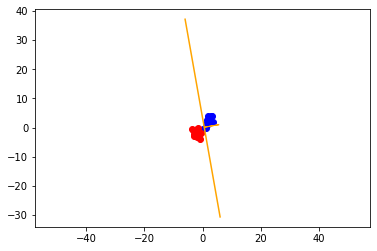

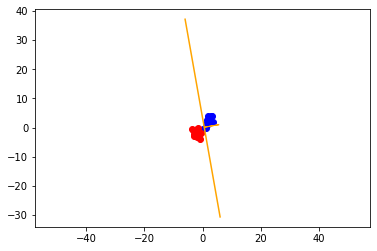

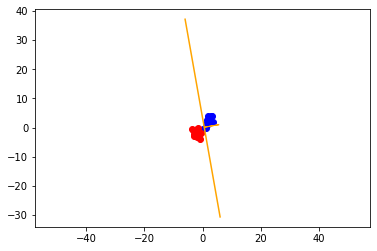

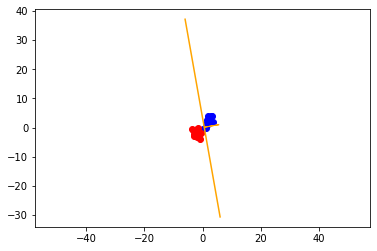

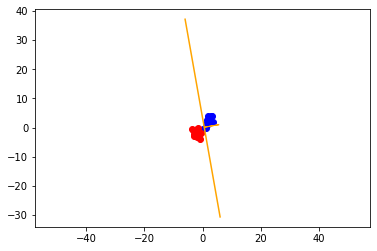

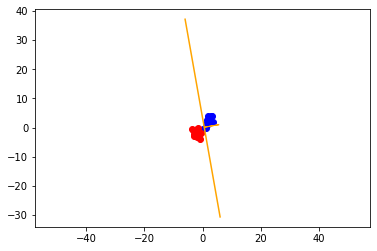

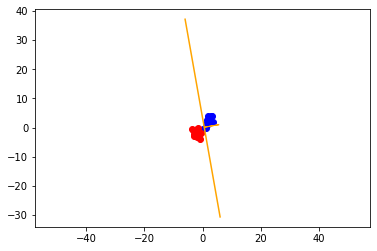

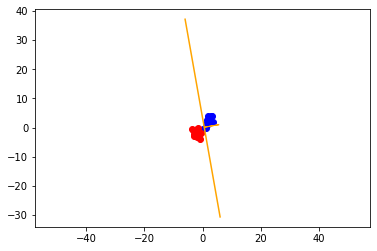

loss = 10.39724051567045


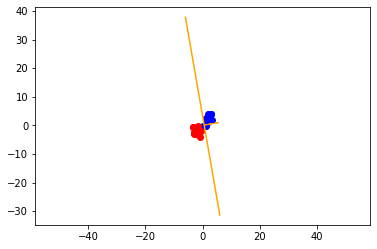

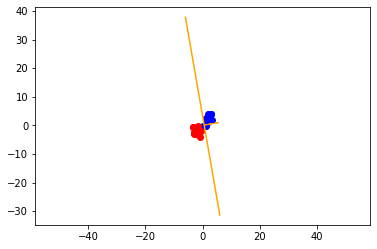

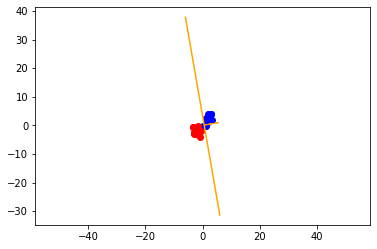

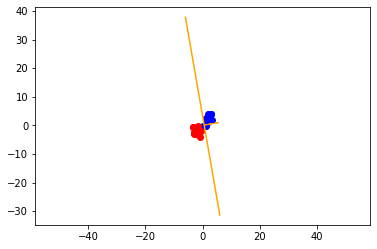

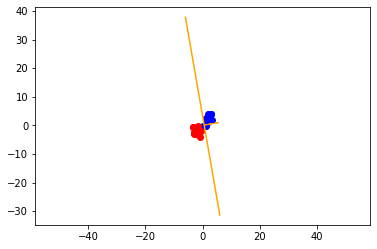

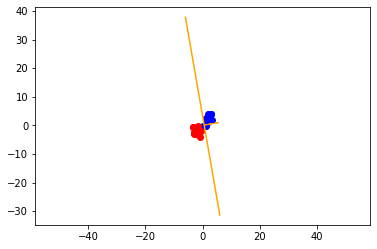

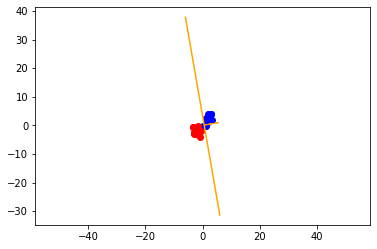

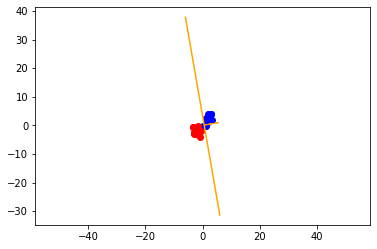

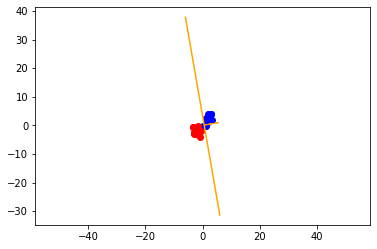

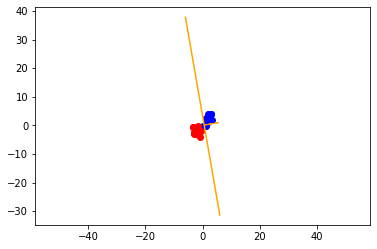

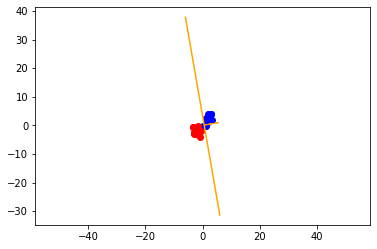

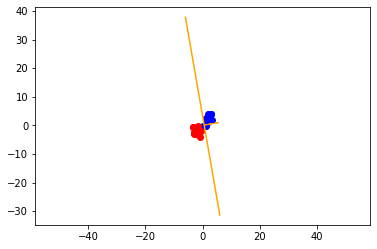

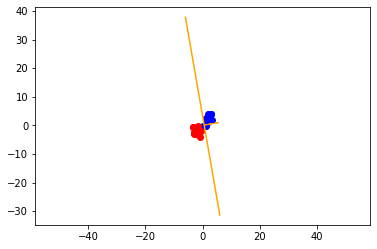

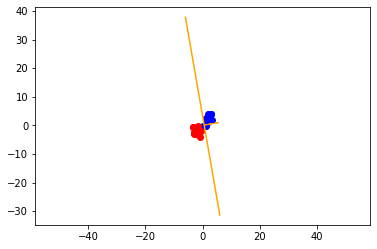

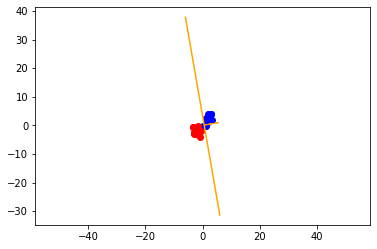

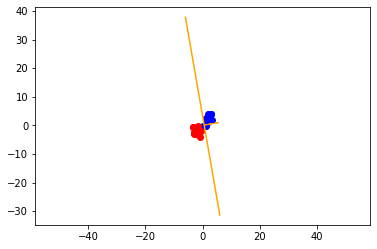

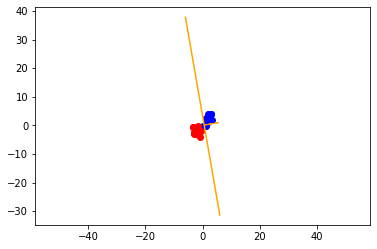

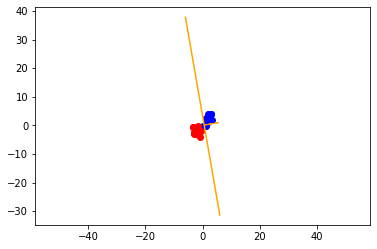

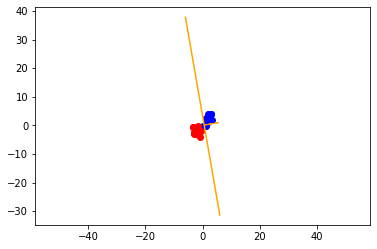

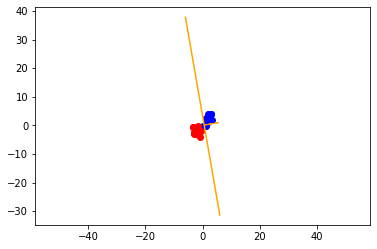

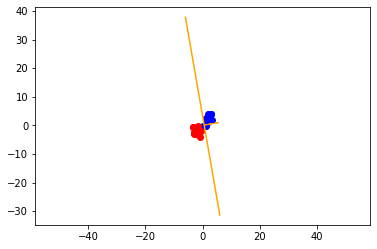

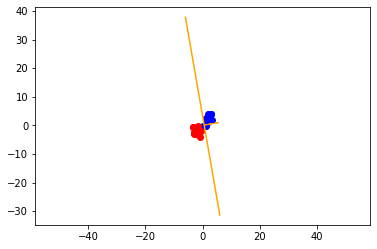

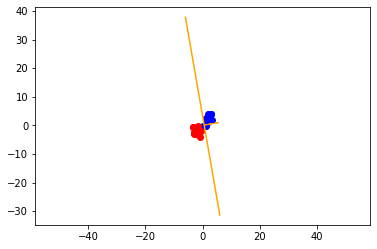

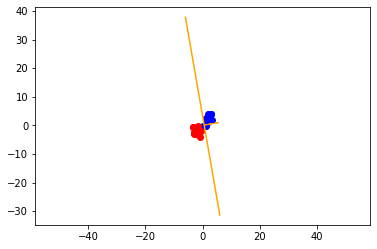

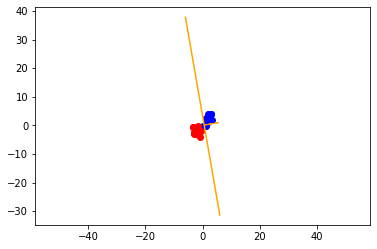

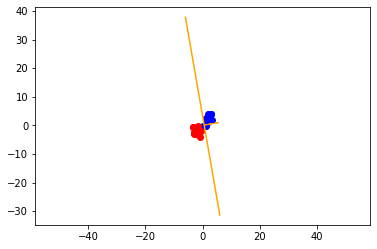

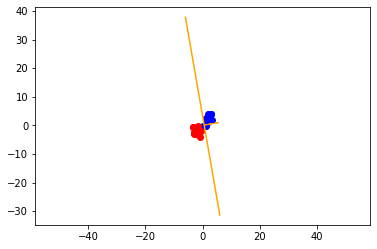

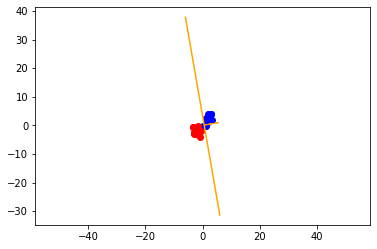

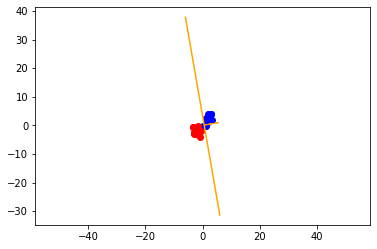

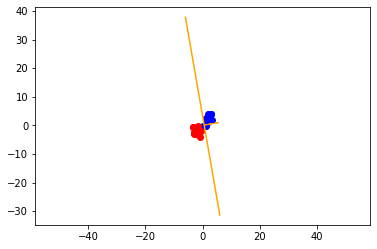

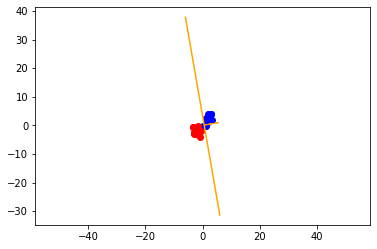

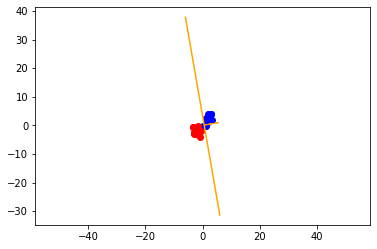

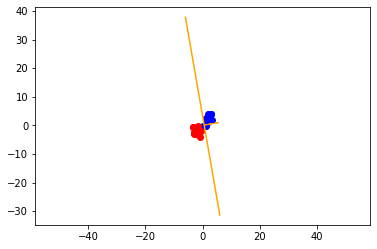

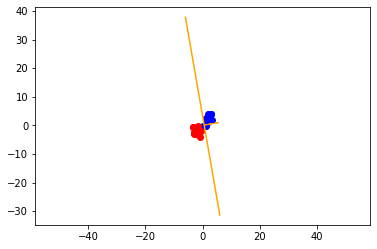

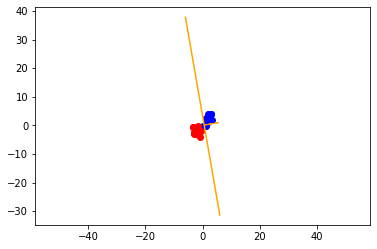

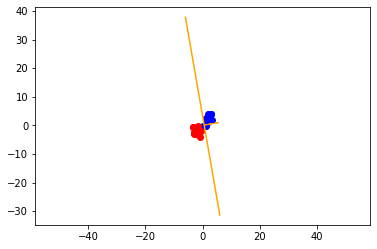

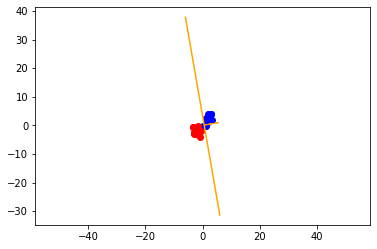

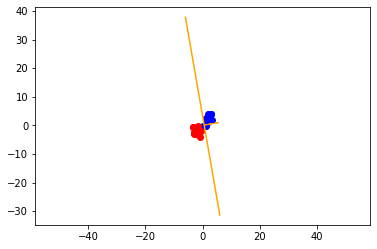

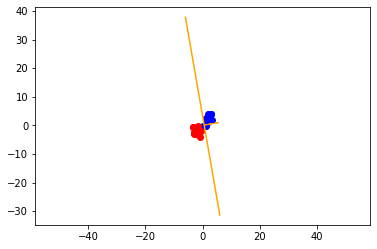

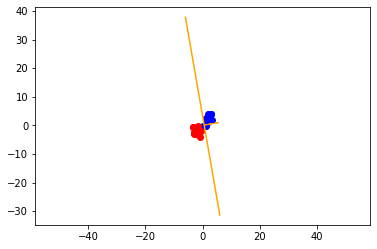

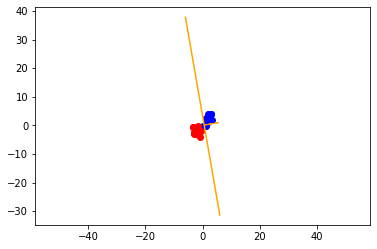

loss = 10.391615639070203


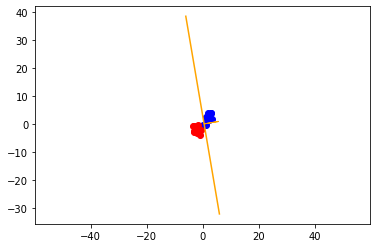

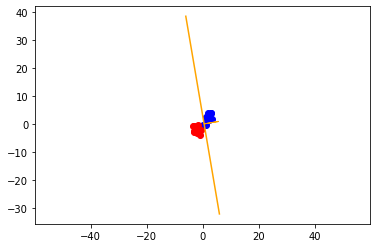

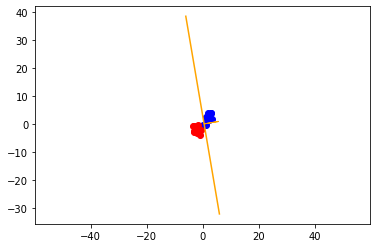

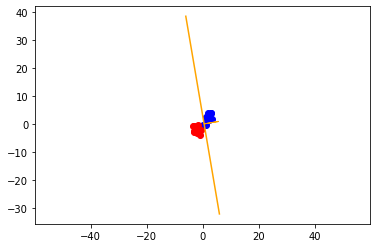

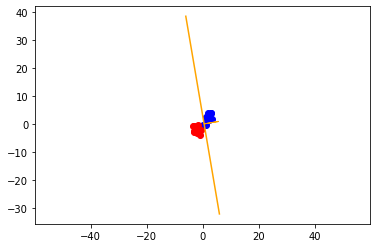

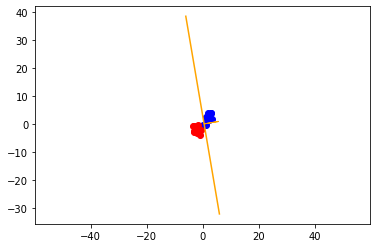

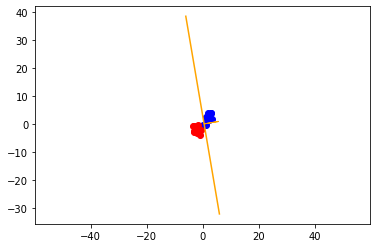

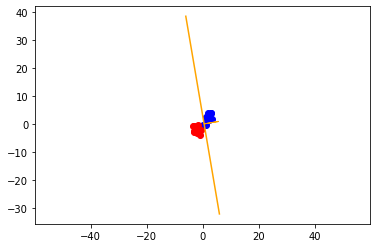

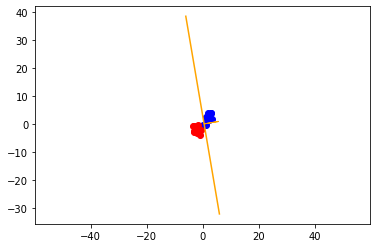

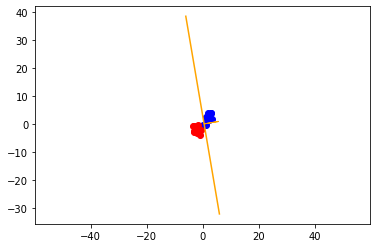

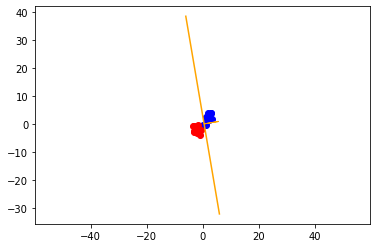

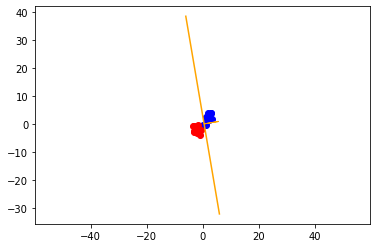

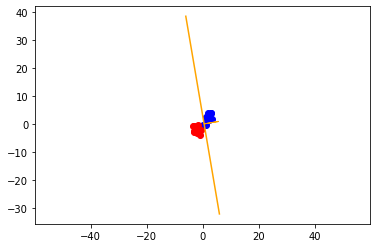

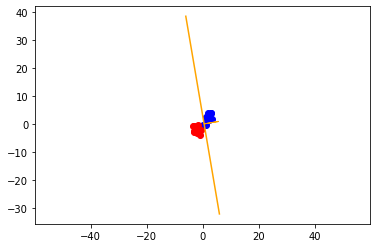

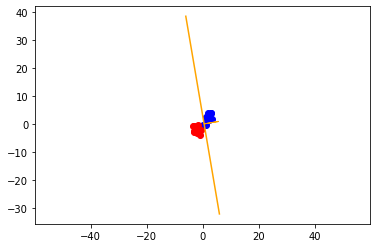

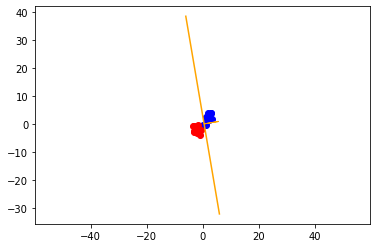

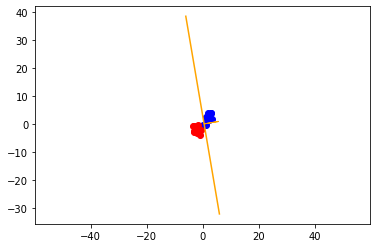

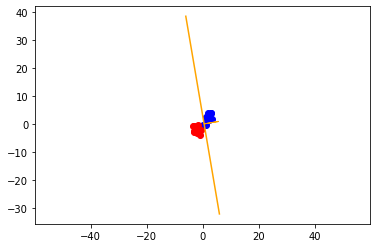

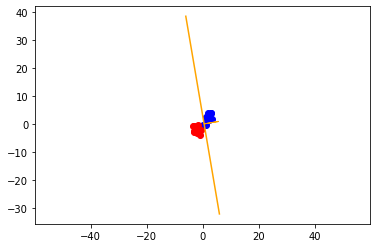

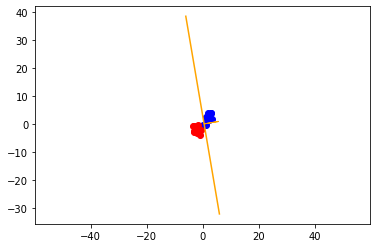

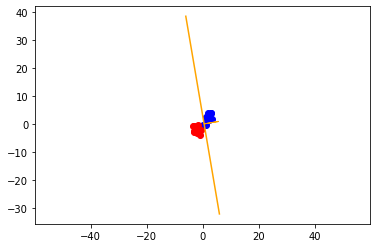

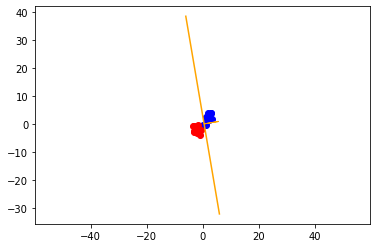

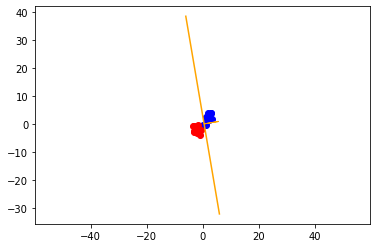

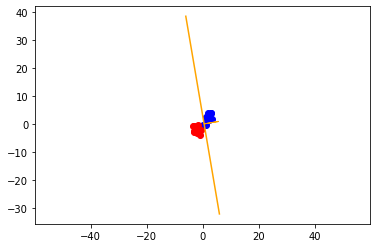

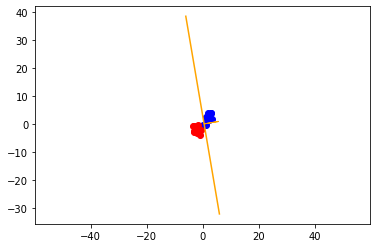

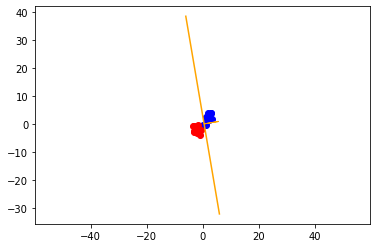

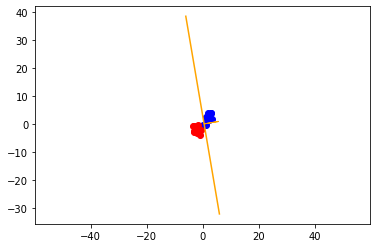

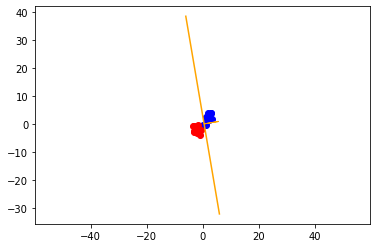

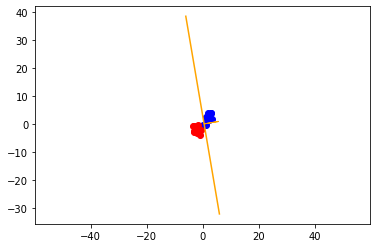

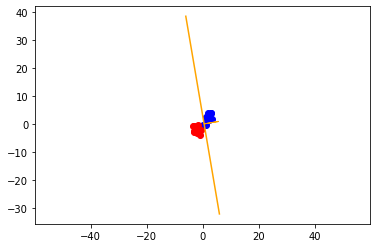

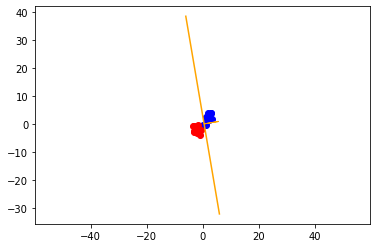

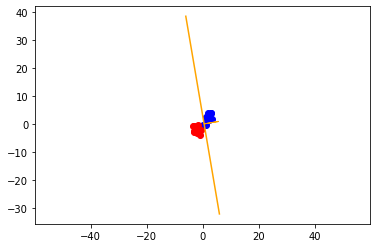

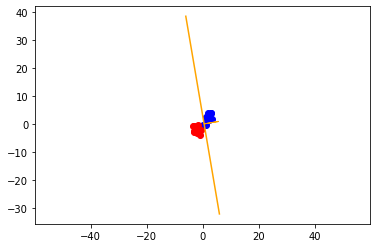

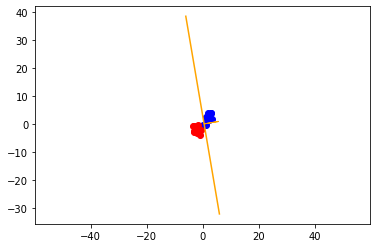

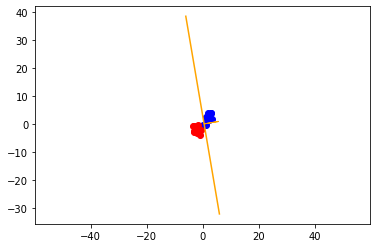

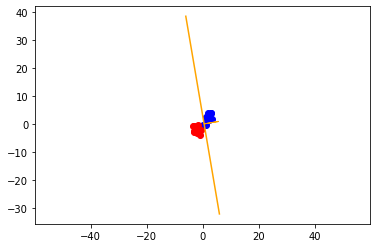

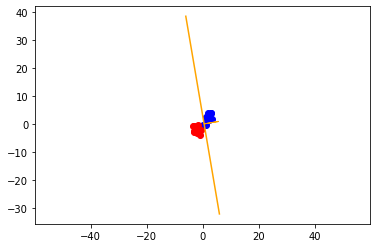

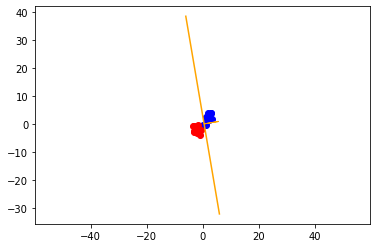

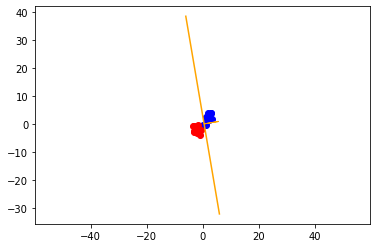

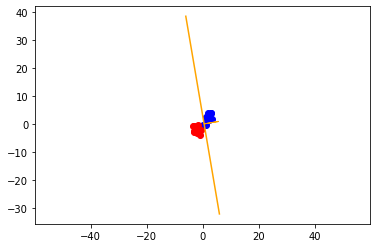

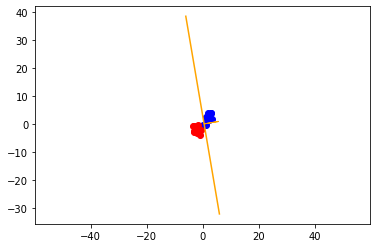

loss = 10.385730011292564


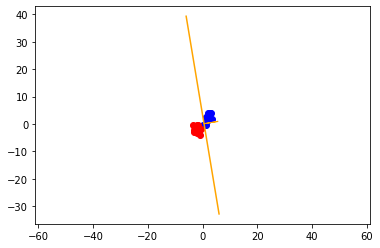

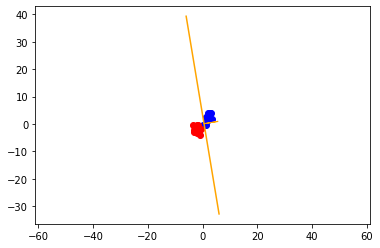

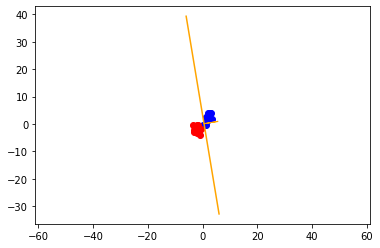

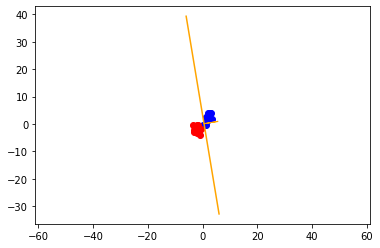

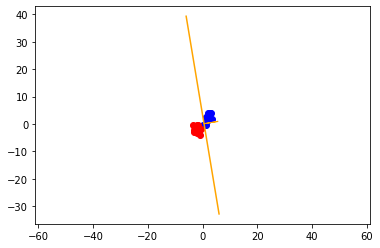

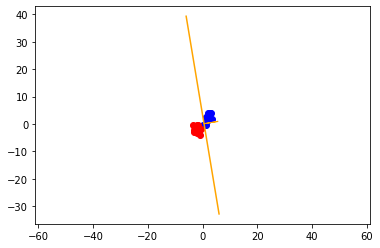

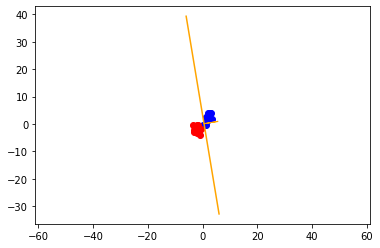

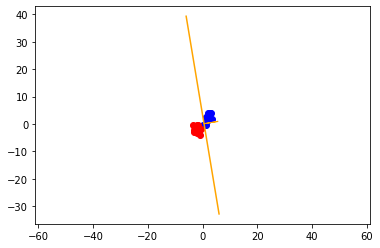

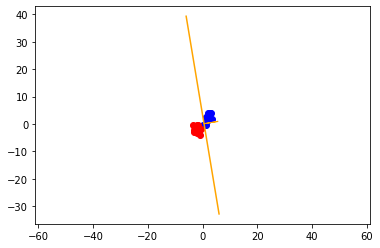

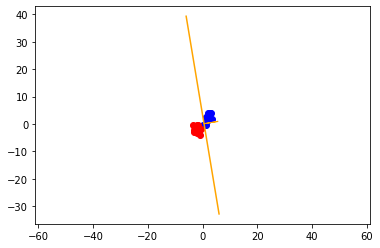

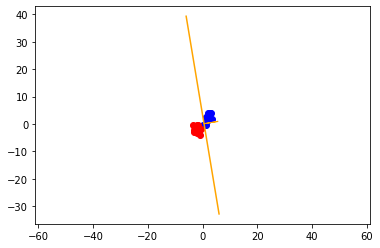

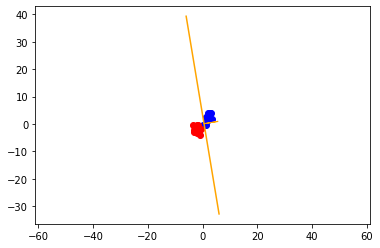

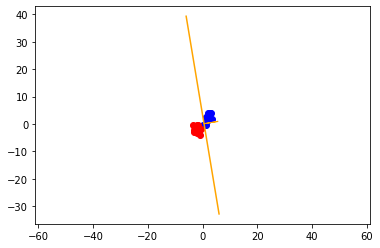

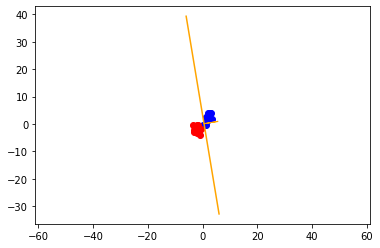

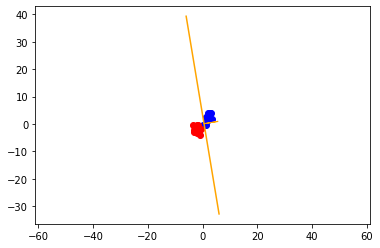

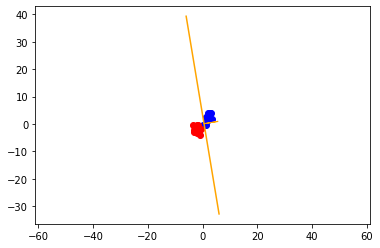

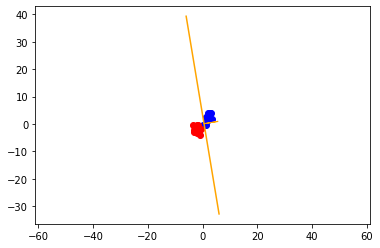

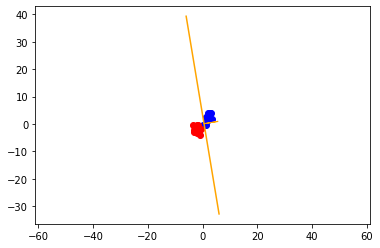

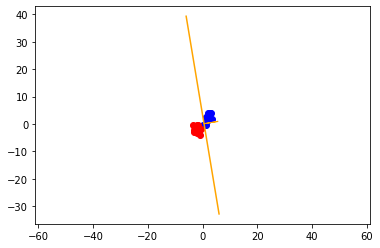

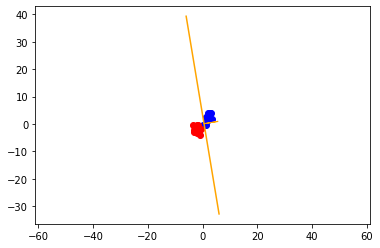

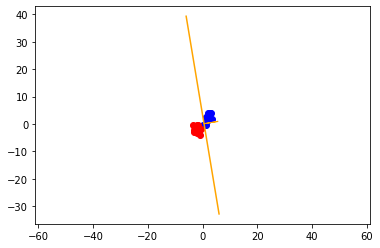

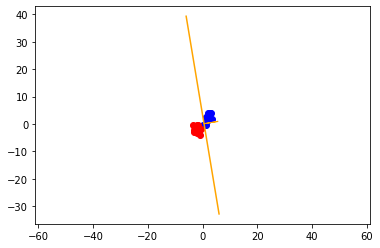

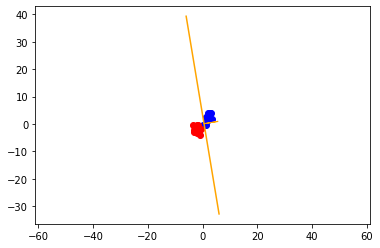

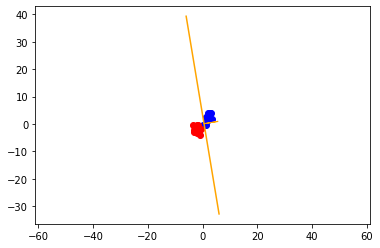

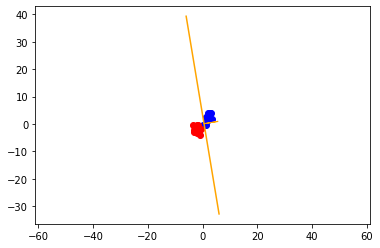

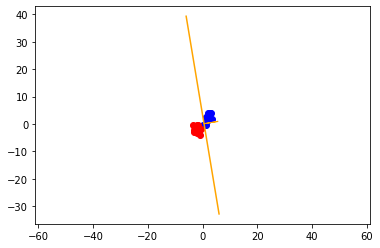

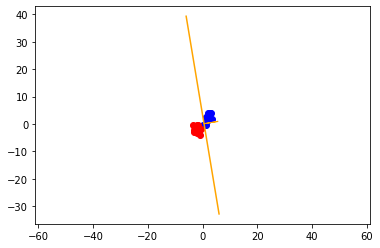

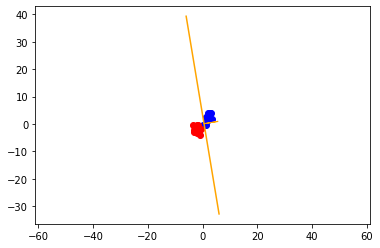

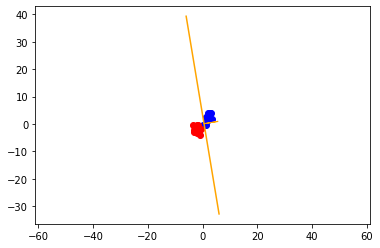

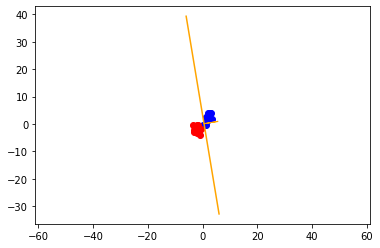

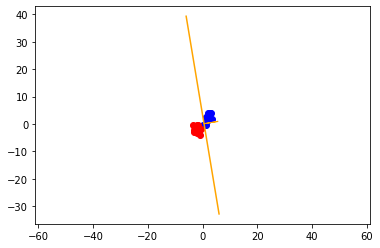

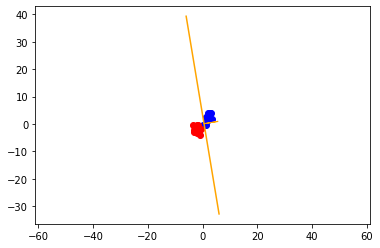

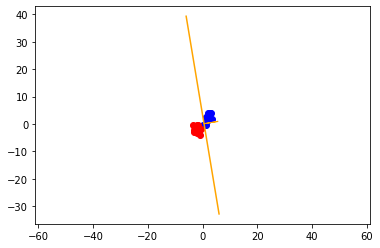

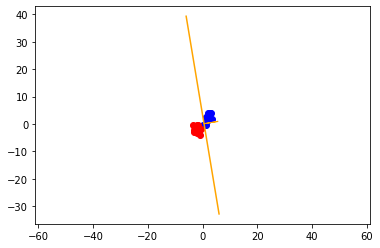

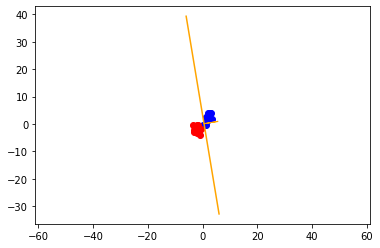

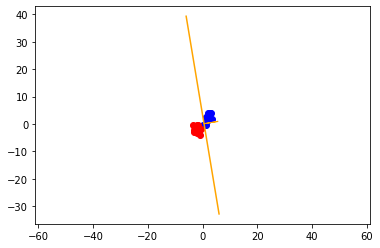

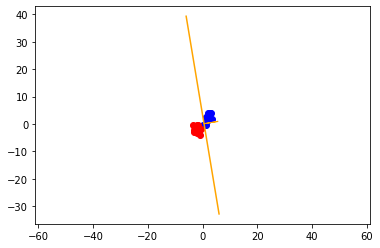

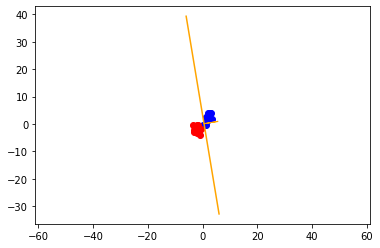

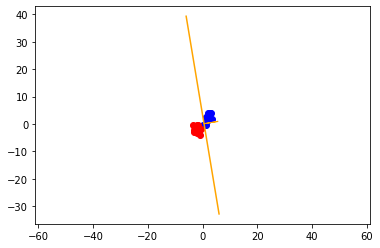

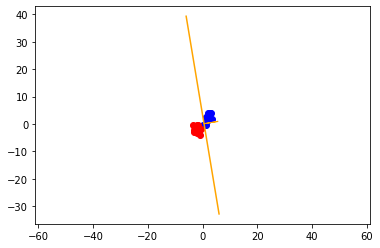

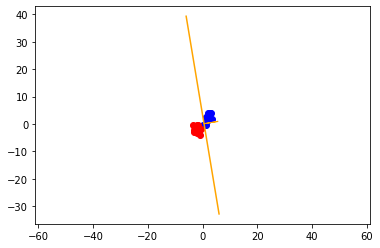

loss = 10.379554701622736


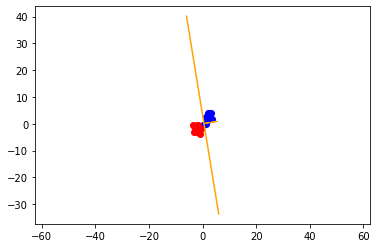

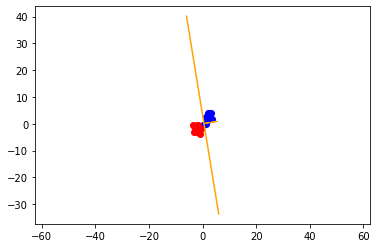

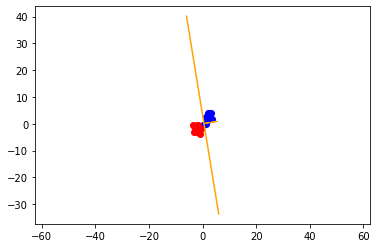

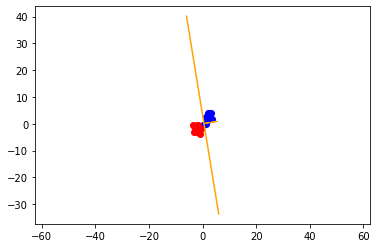

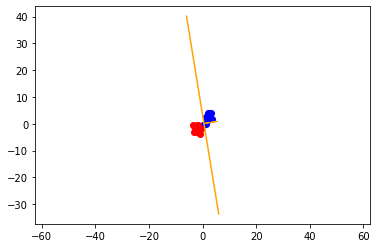

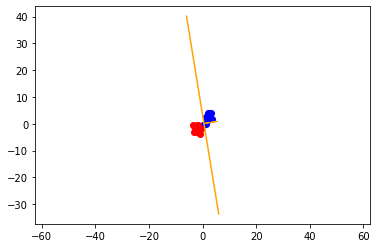

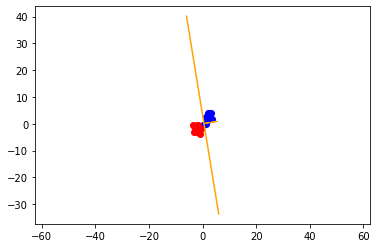

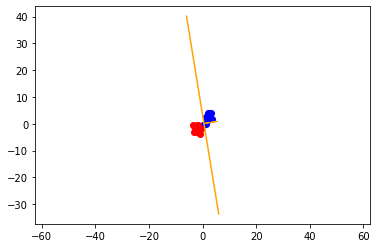

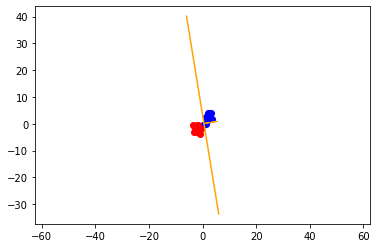

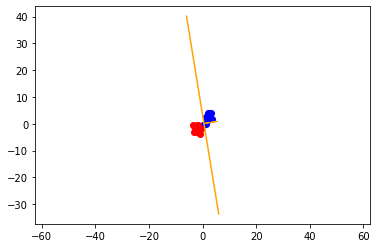

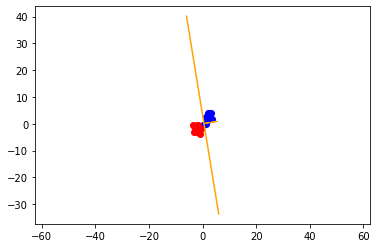

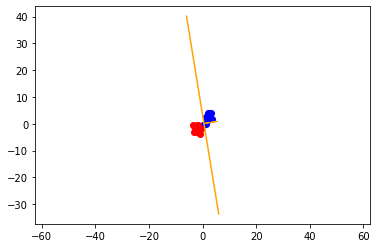

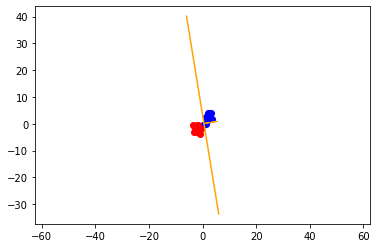

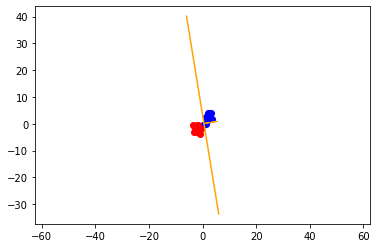

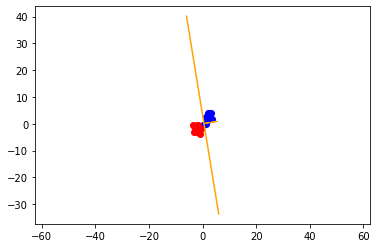

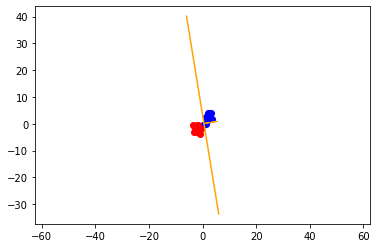

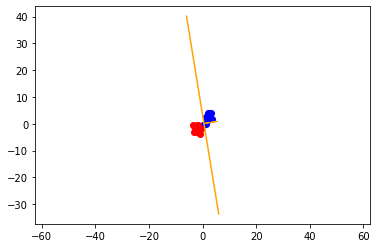

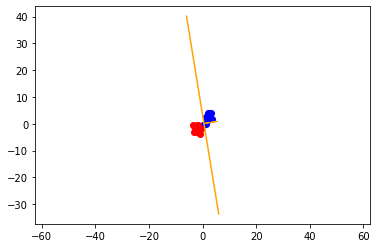

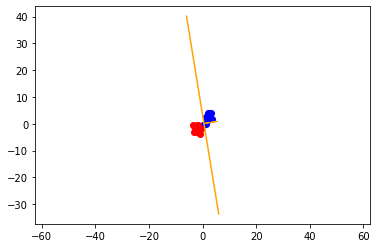

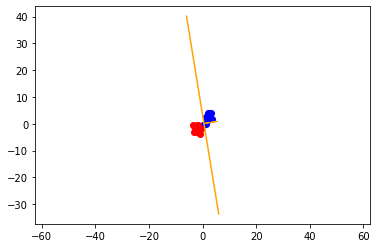

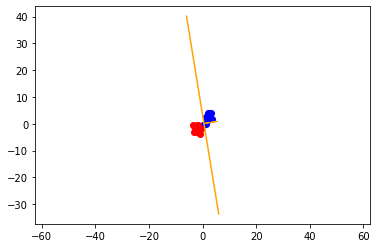

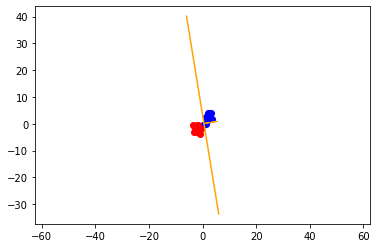

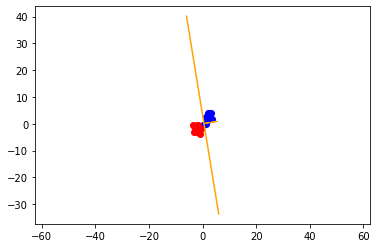

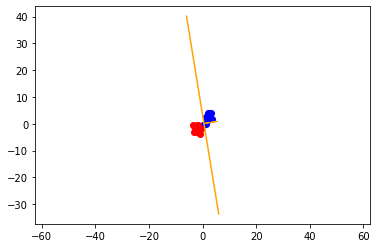

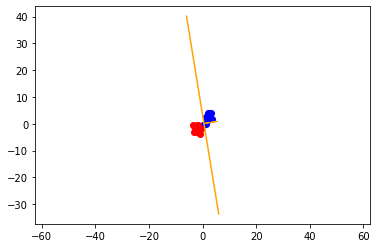

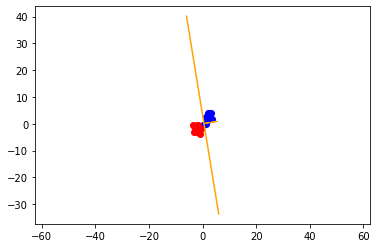

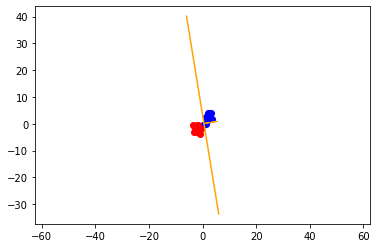

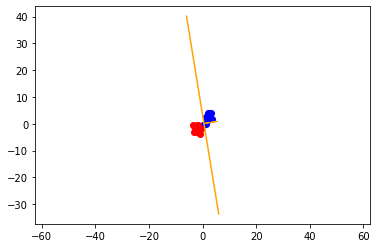

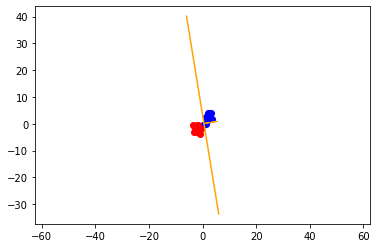

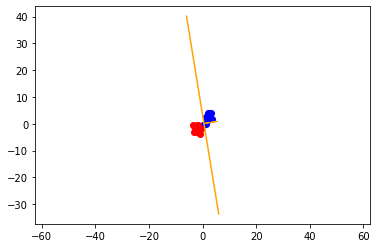

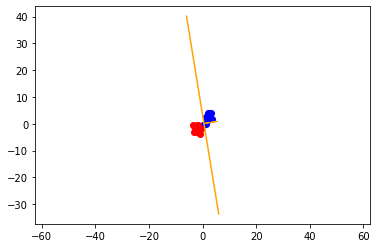

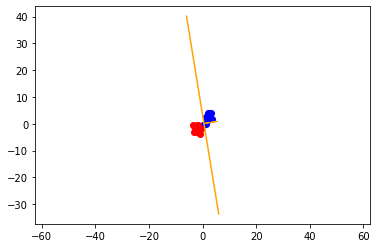

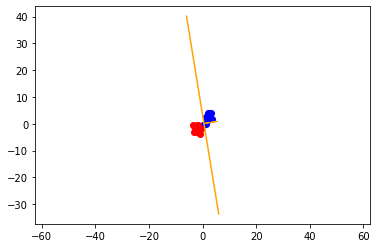

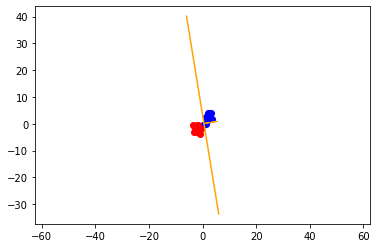

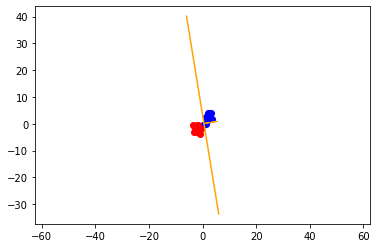

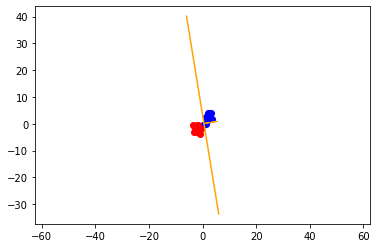

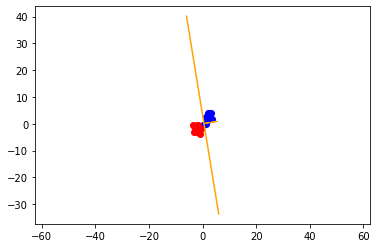

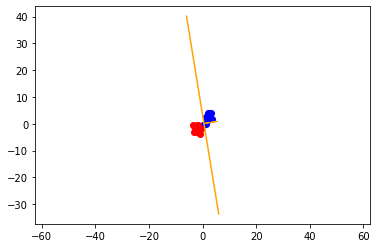

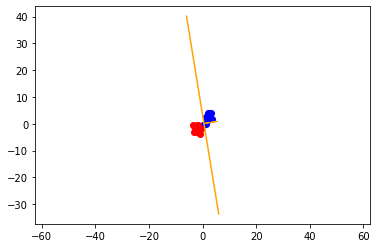

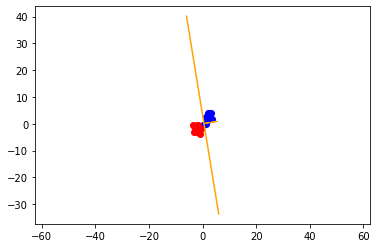

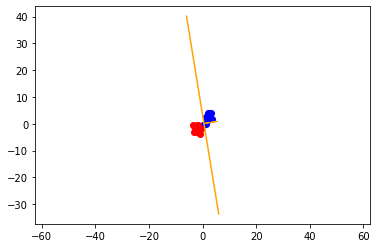

loss = 10.373061115537494


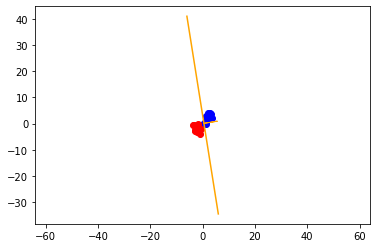

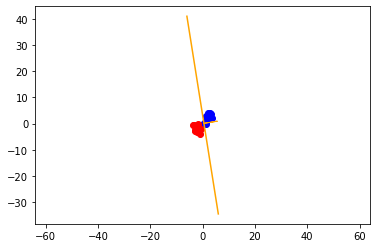

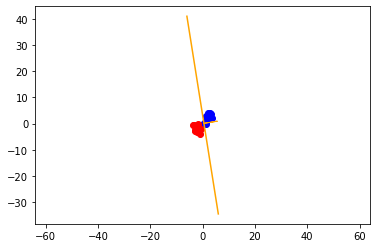

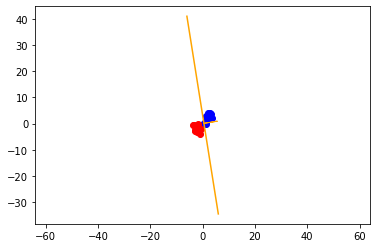

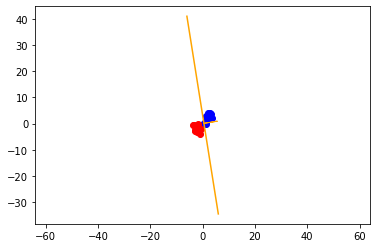

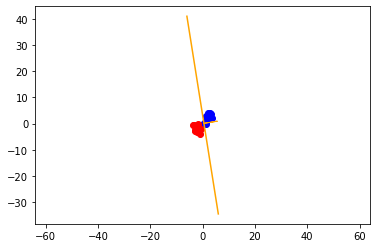

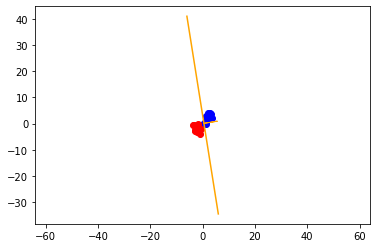

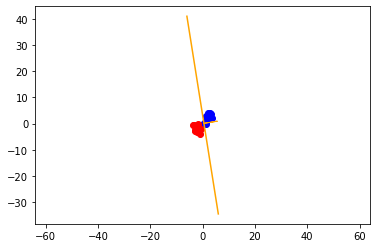

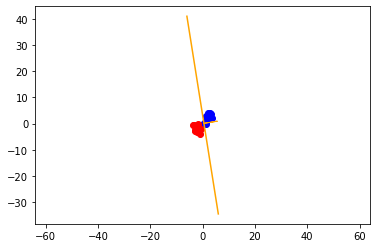

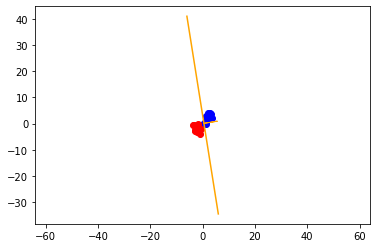

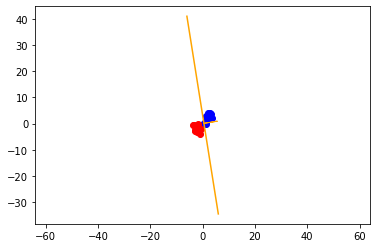

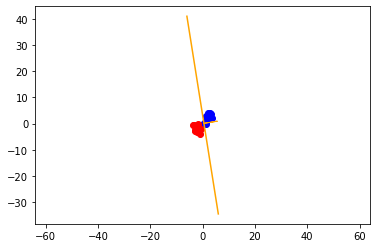

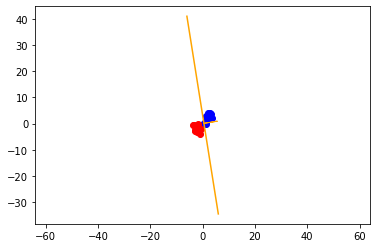

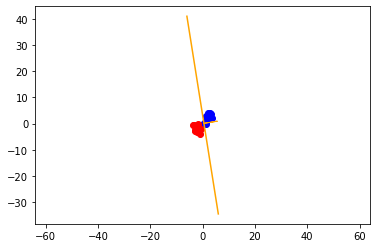

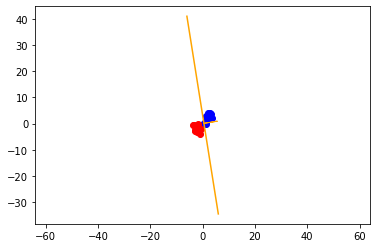

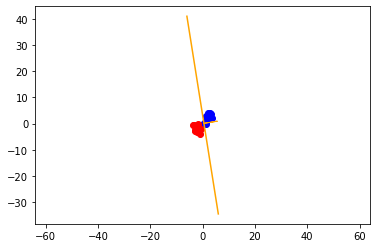

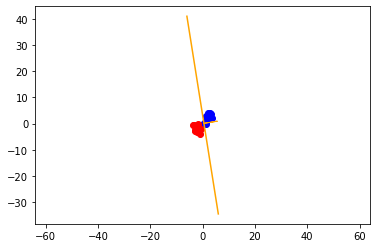

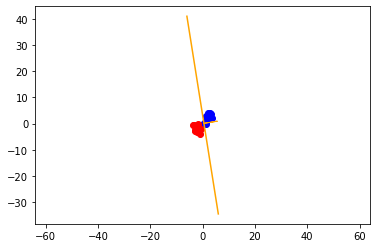

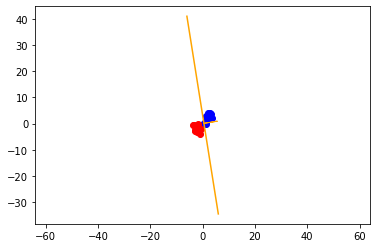

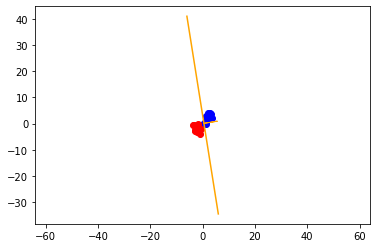

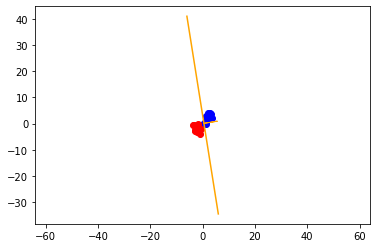

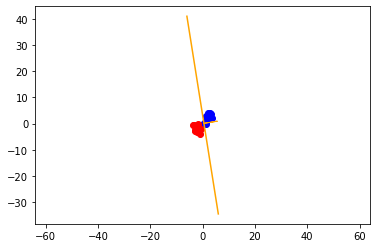

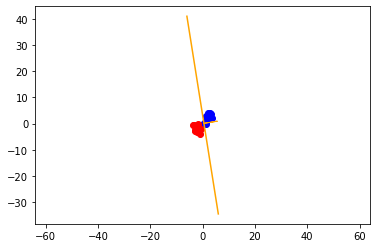

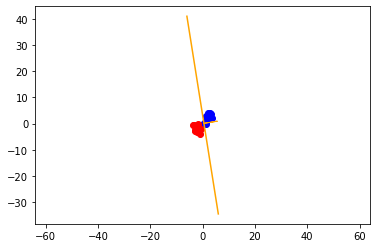

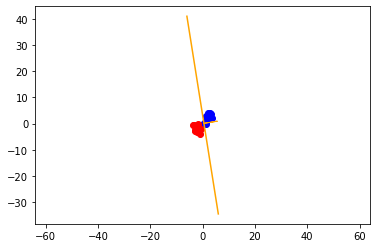

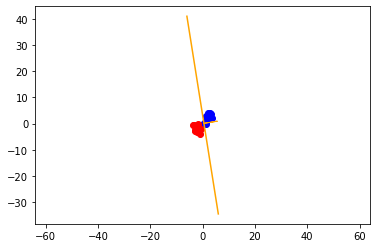

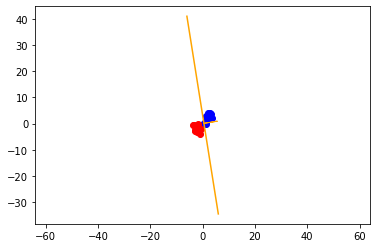

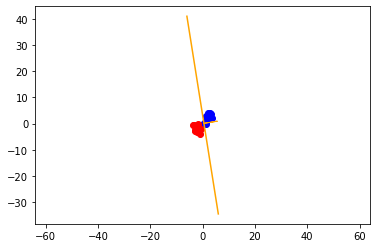

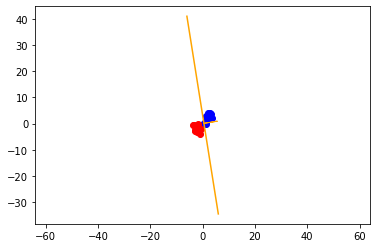

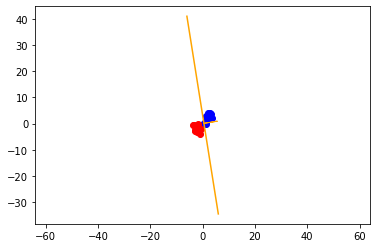

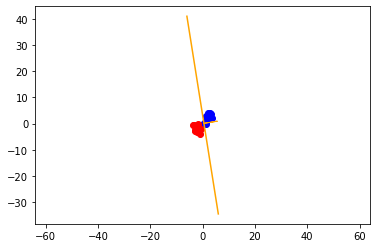

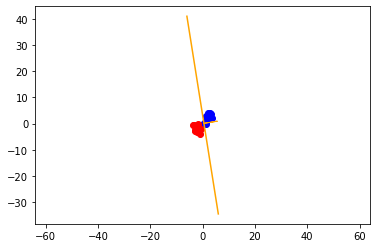

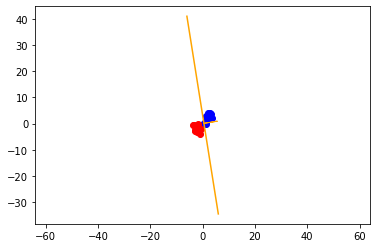

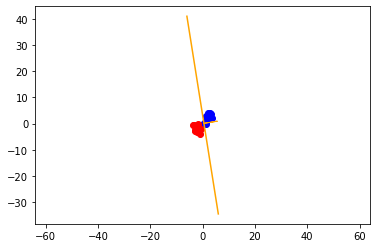

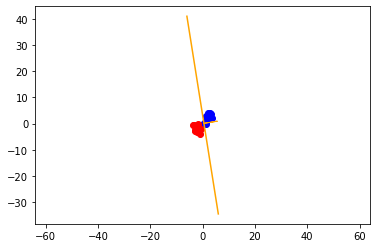

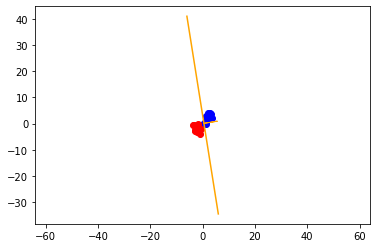

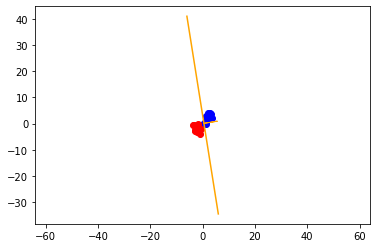

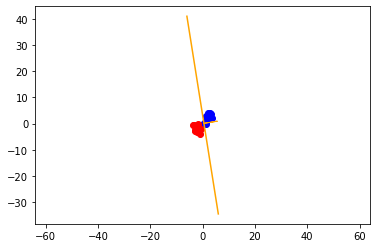

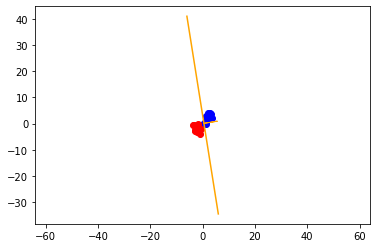

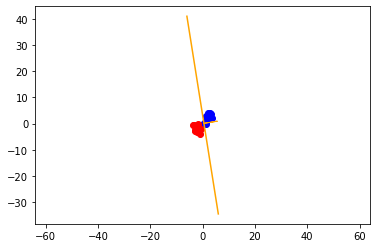

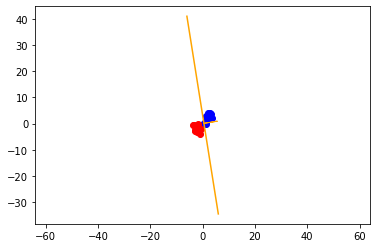

loss = 10.366221385278795


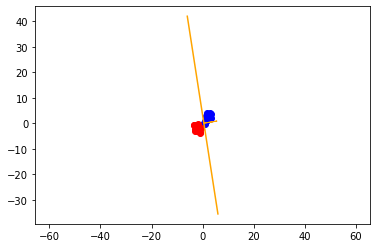

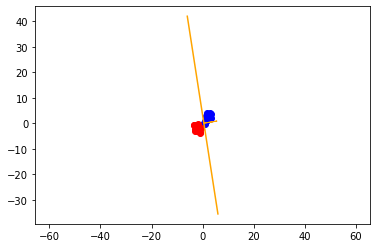

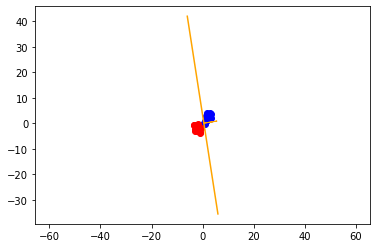

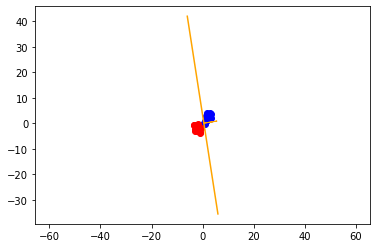

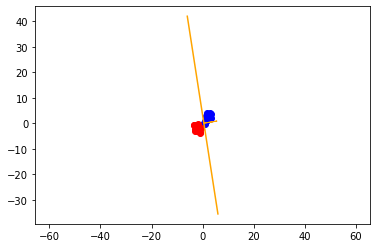

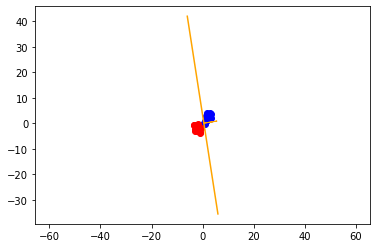

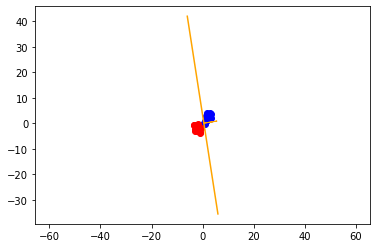

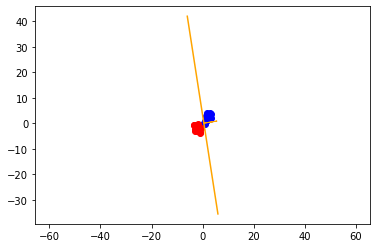

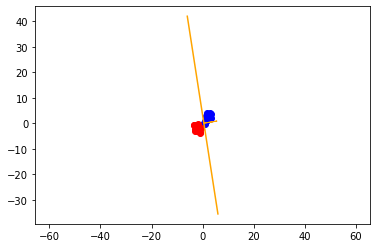

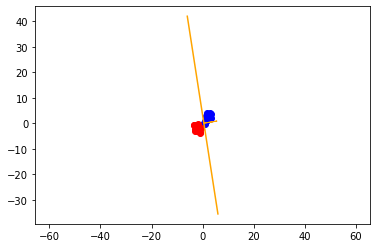

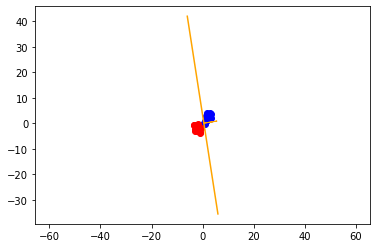

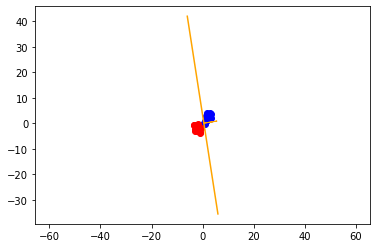

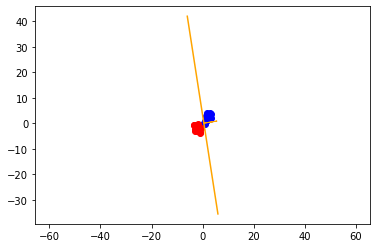

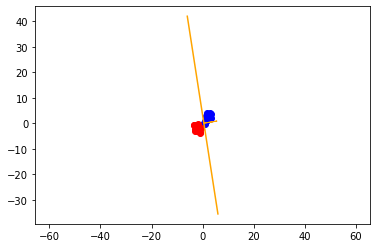

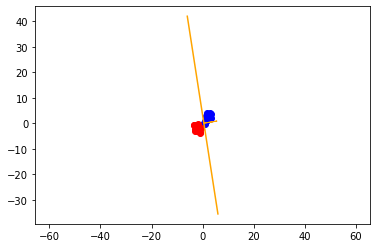

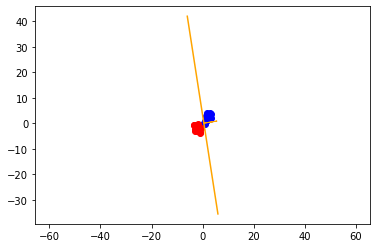

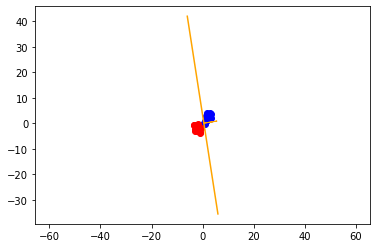

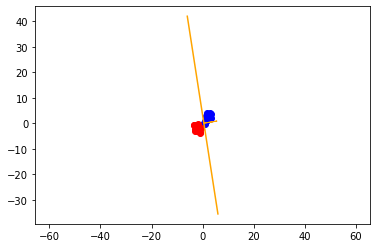

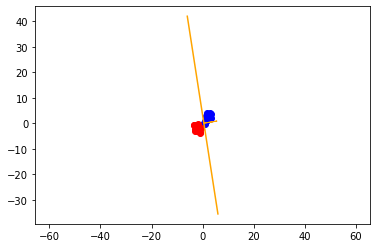

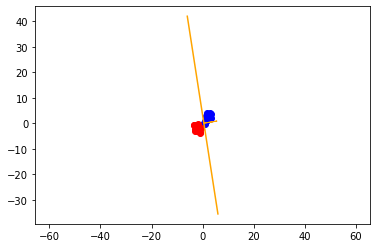

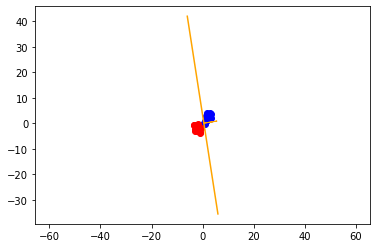

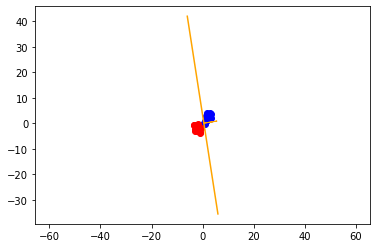

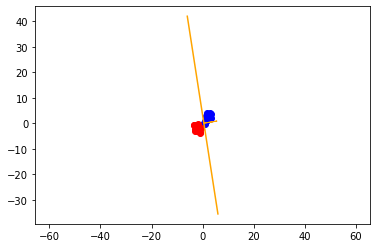

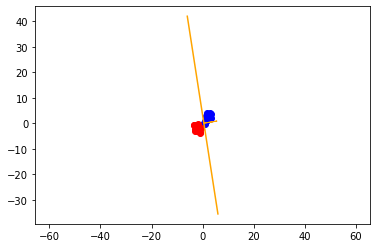

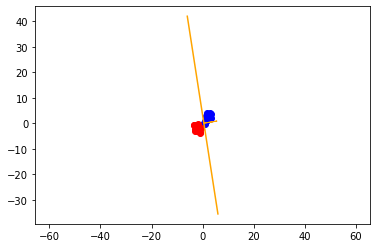

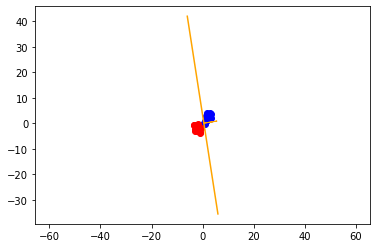

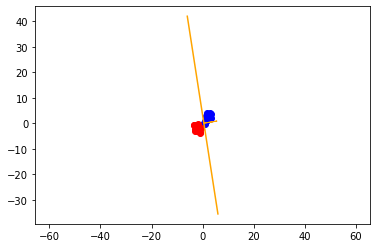

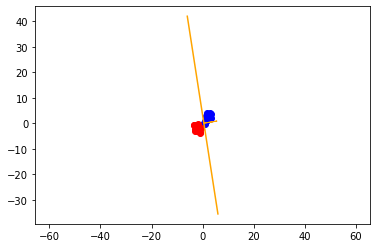

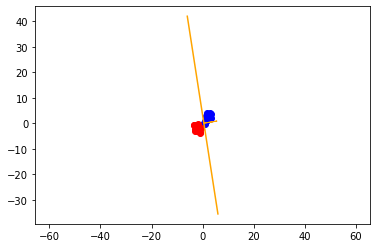

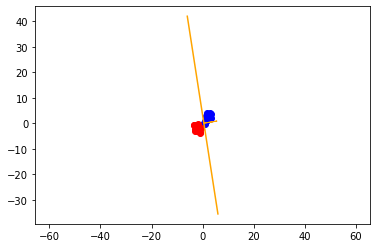

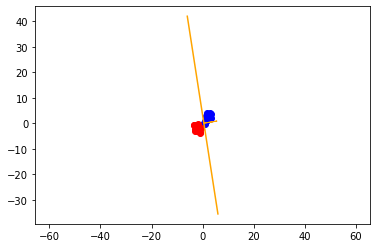

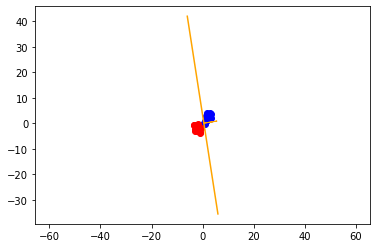

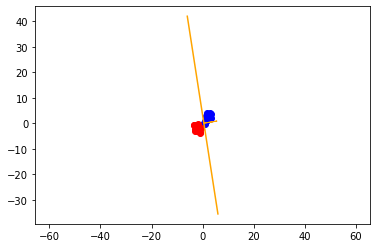

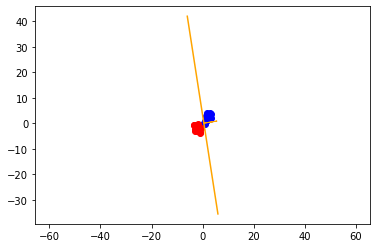

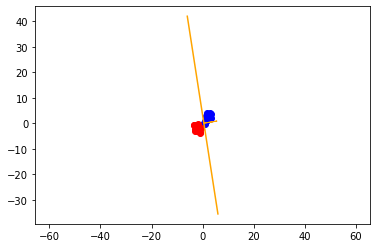

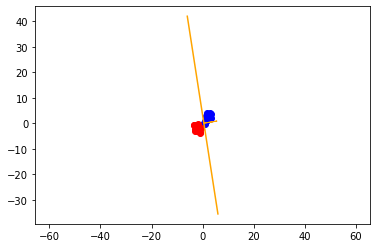

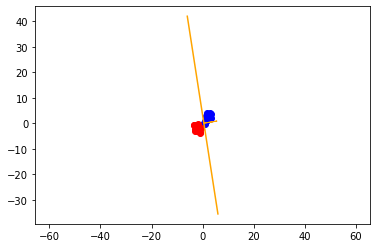

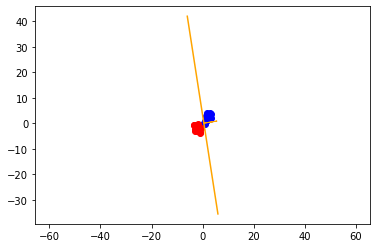

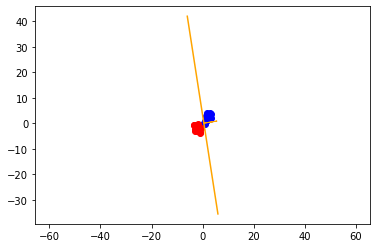

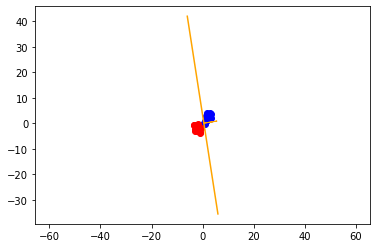

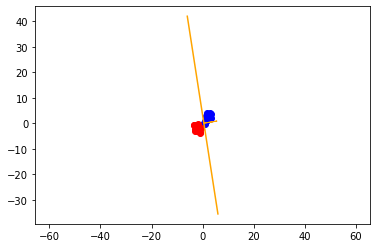

loss = 10.35900896801427


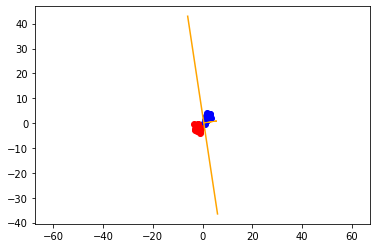

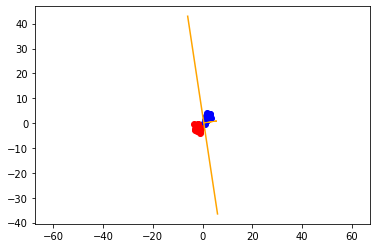

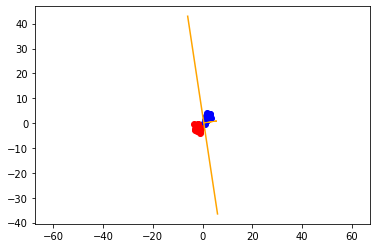

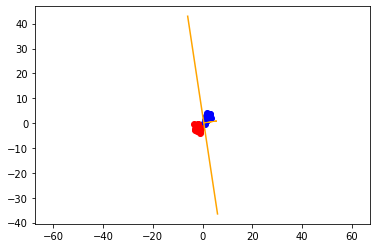

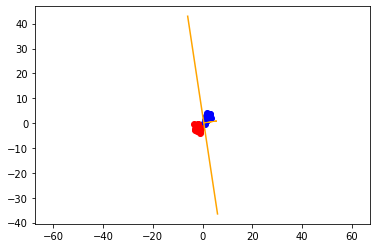

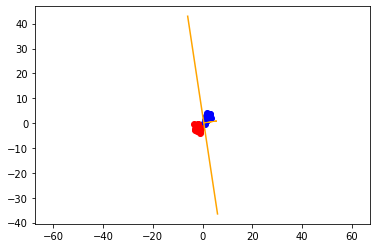

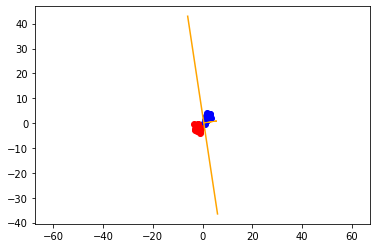

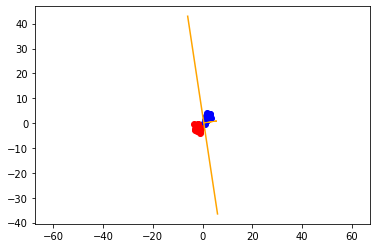

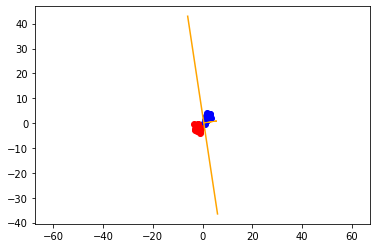

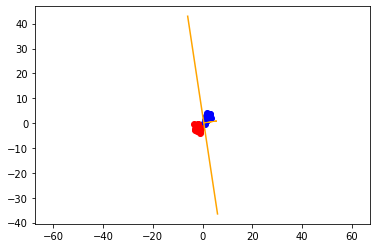

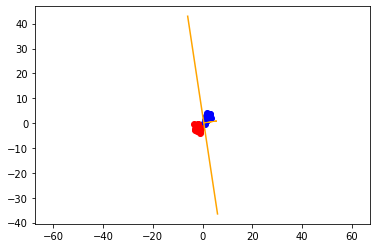

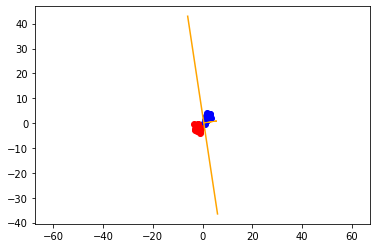

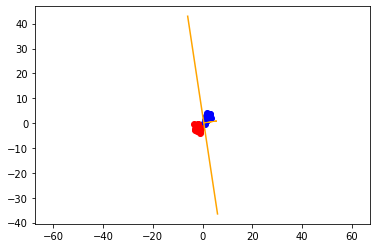

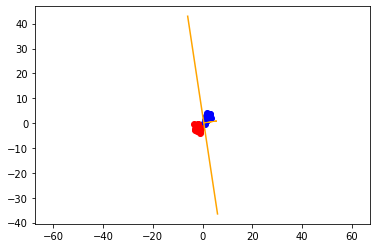

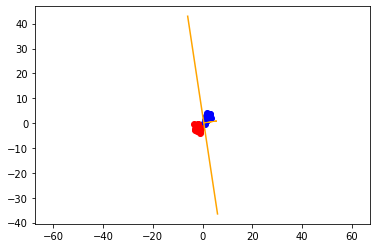

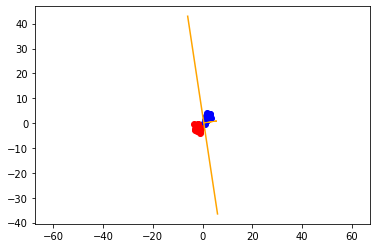

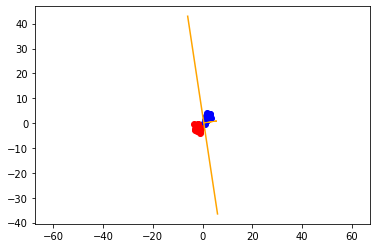

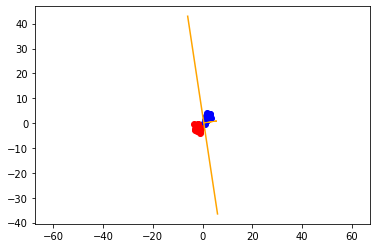

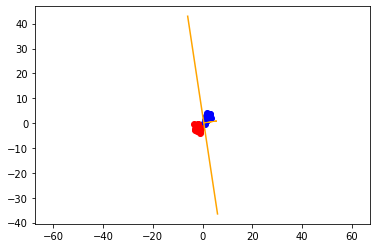

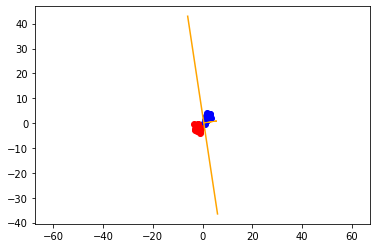

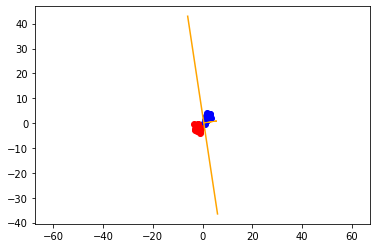

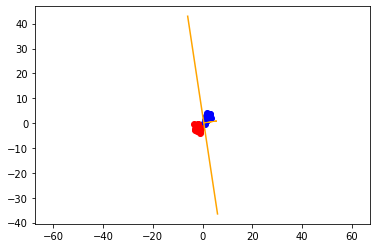

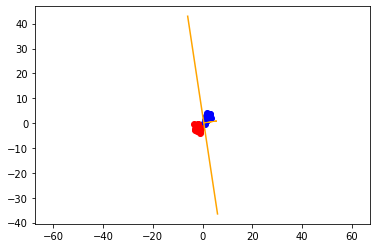

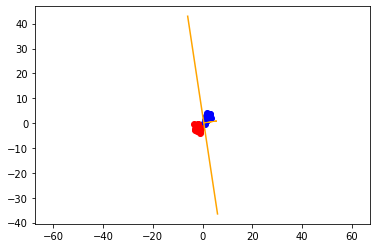

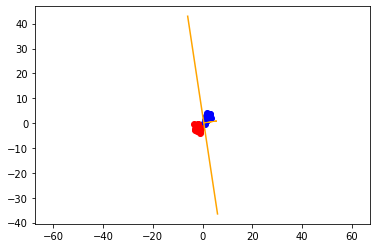

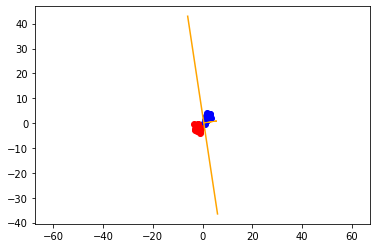

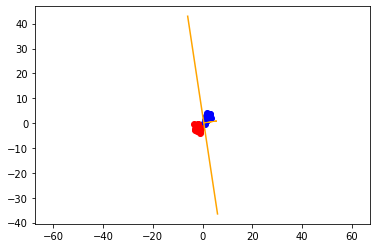

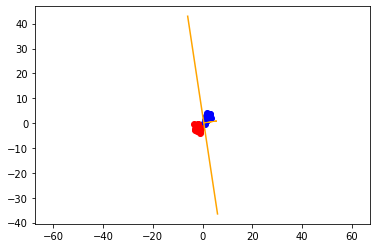

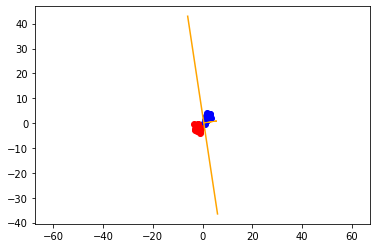

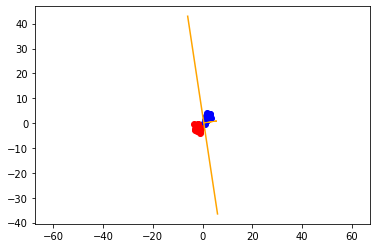

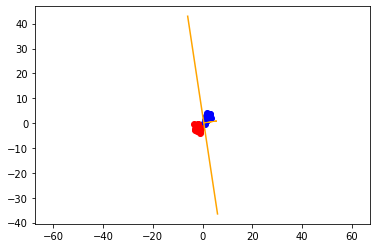

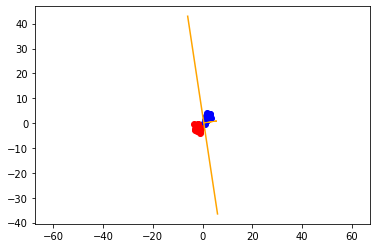

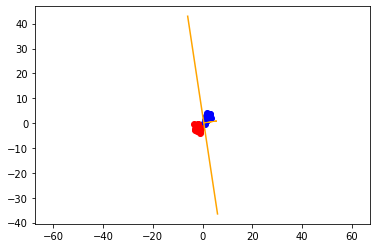

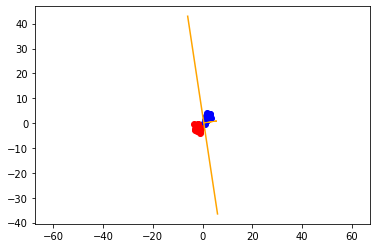

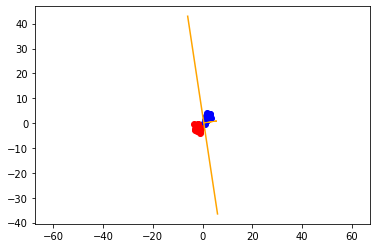

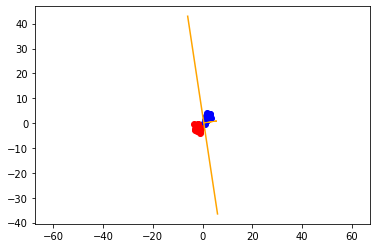

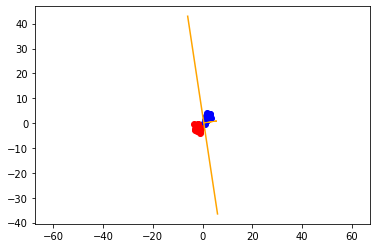

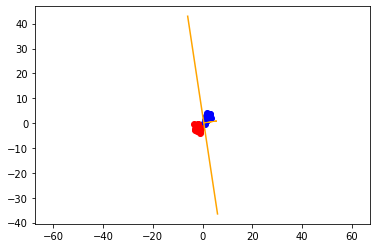

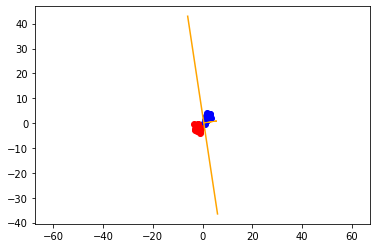

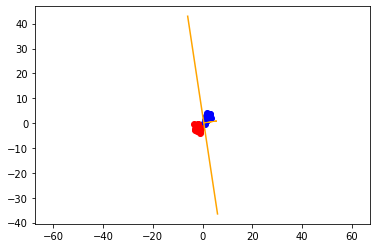

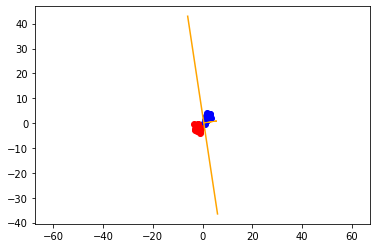

loss = 10.351399480954845


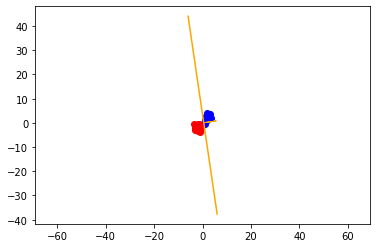

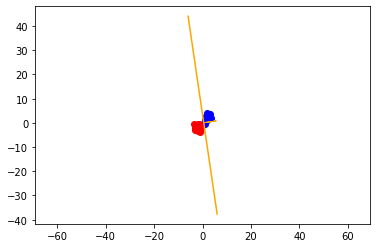

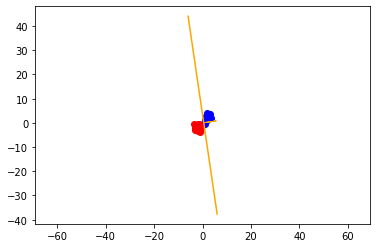

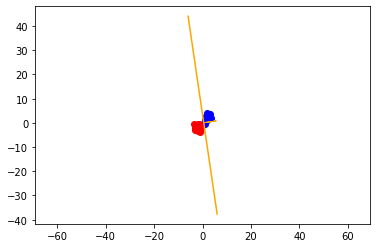

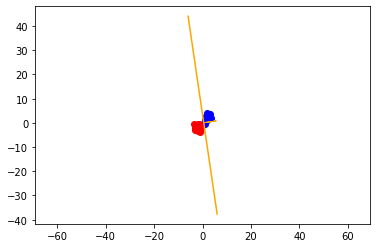

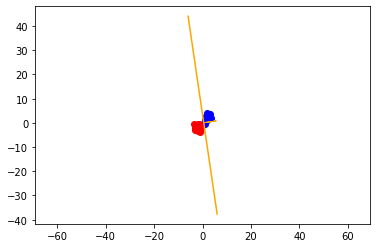

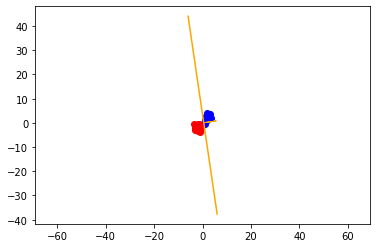

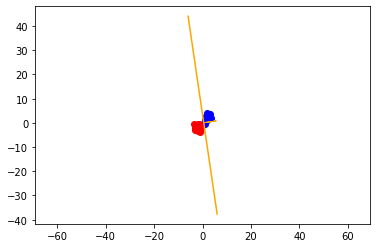

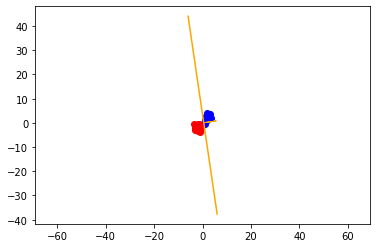

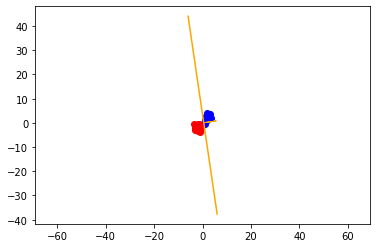

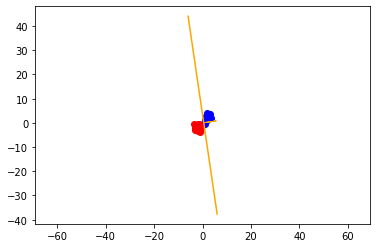

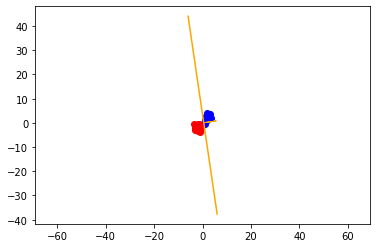

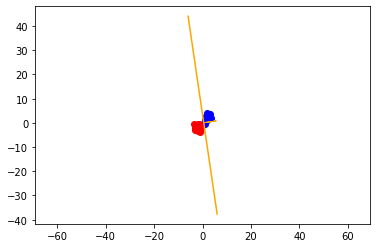

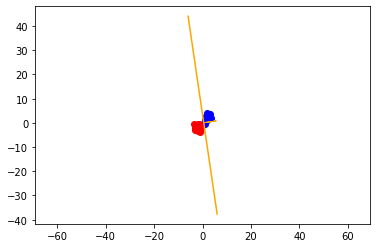

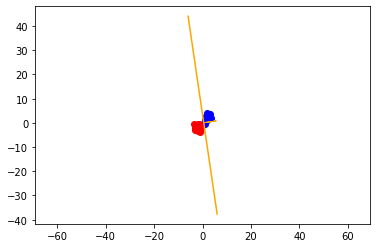

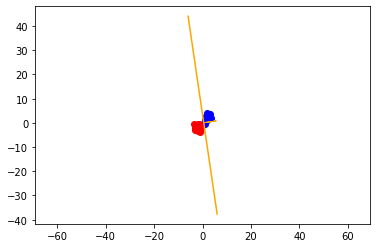

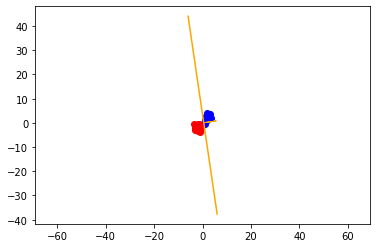

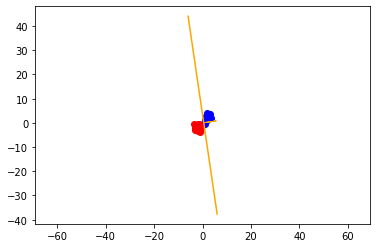

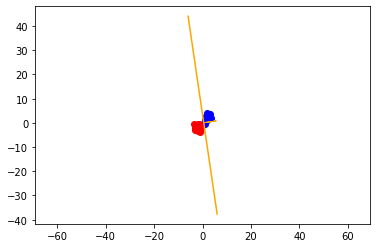

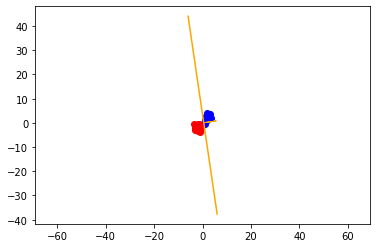

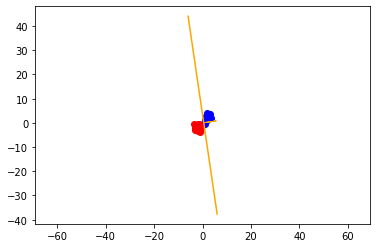

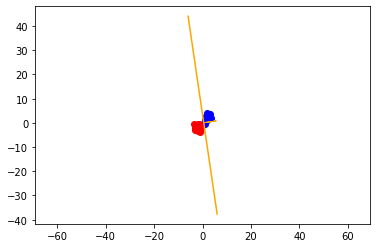

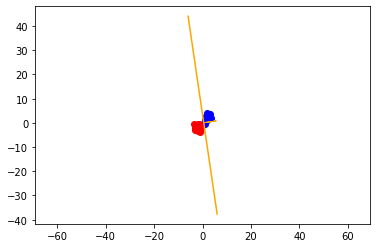

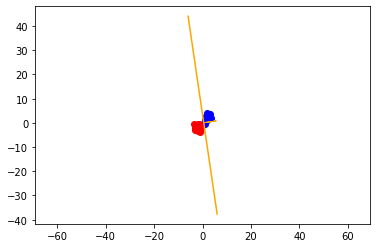

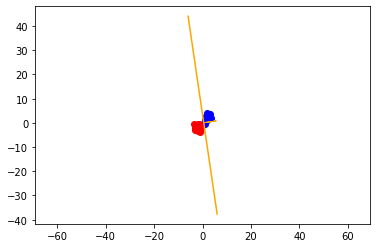

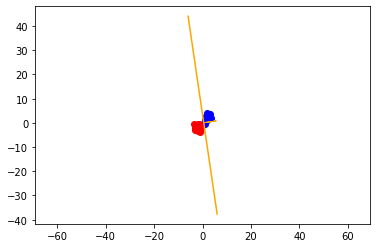

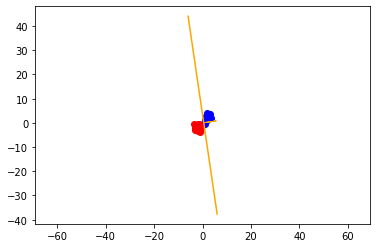

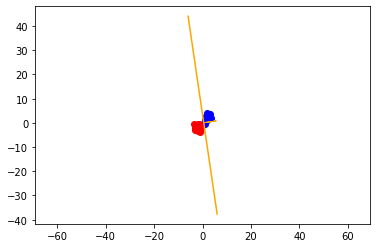

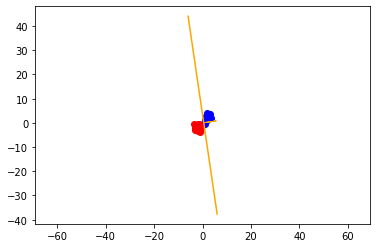

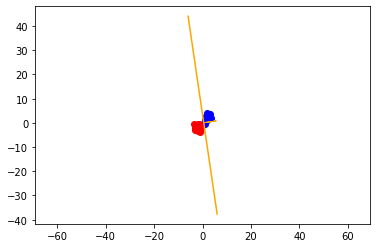

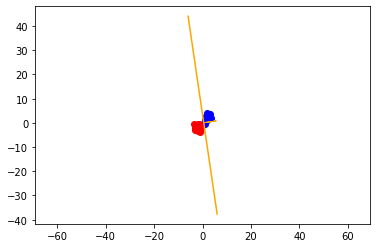

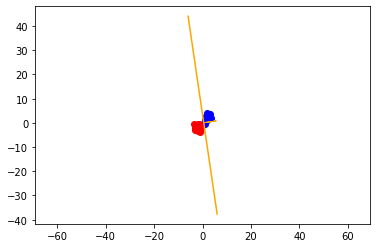

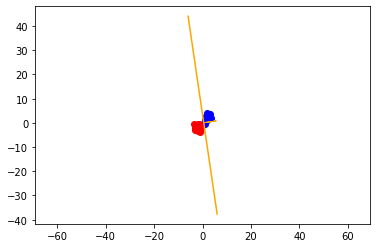

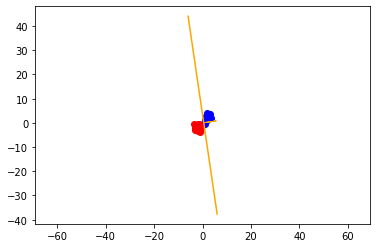

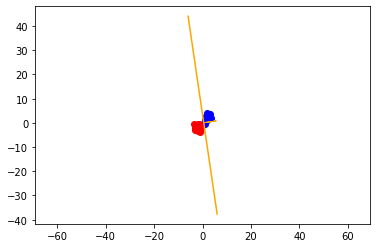

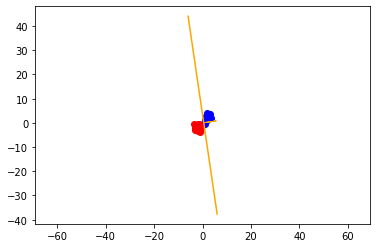

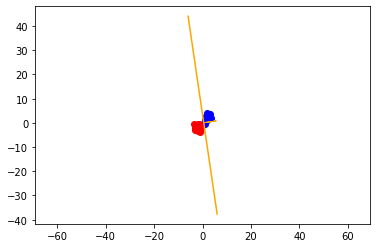

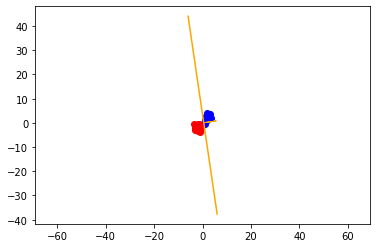

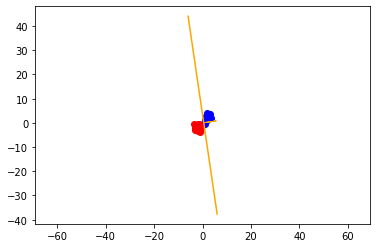

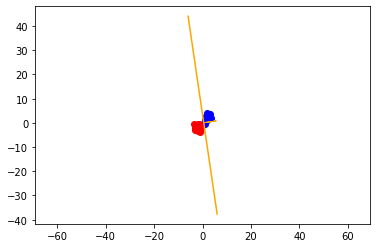

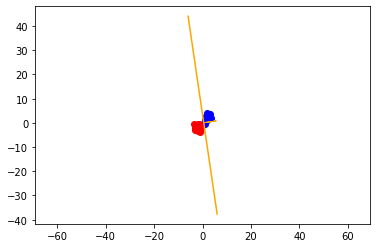

loss = 10.343371799953555


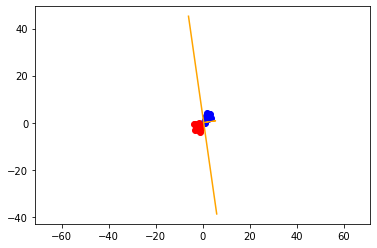

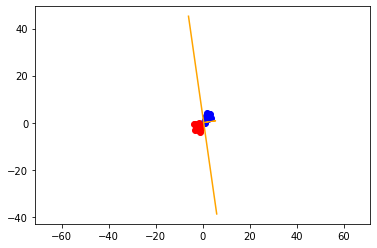

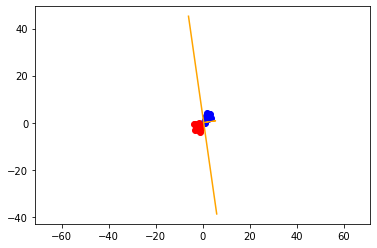

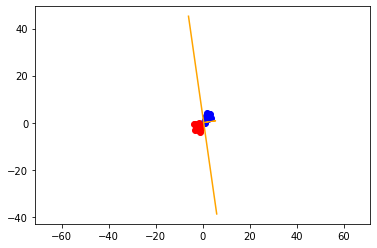

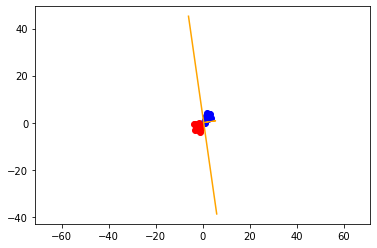

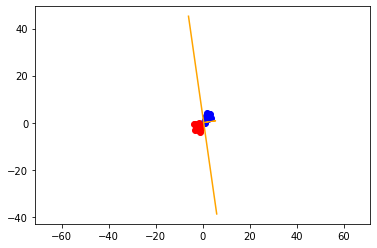

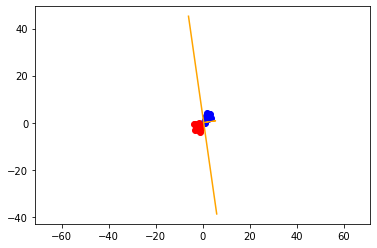

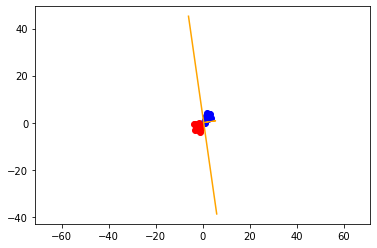

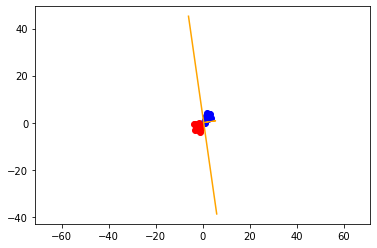

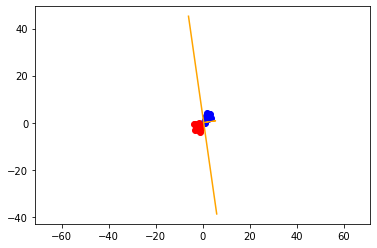

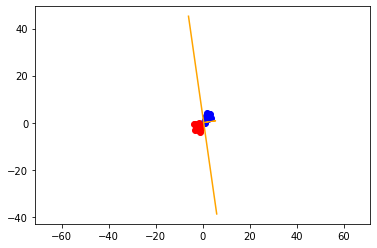

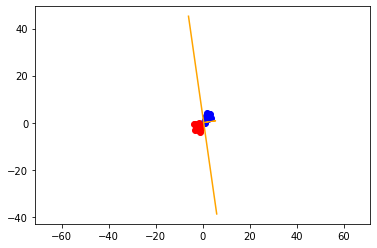

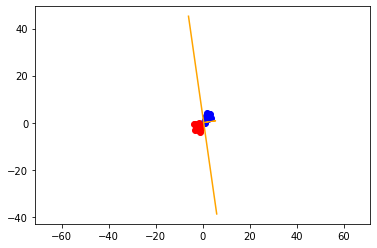

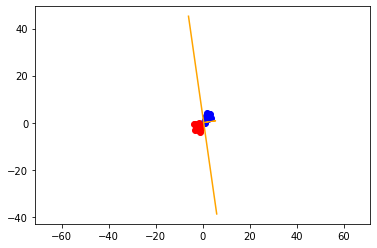

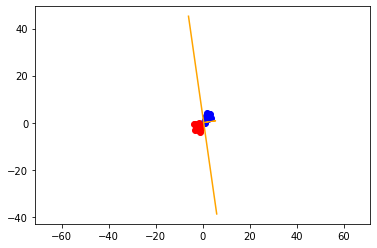

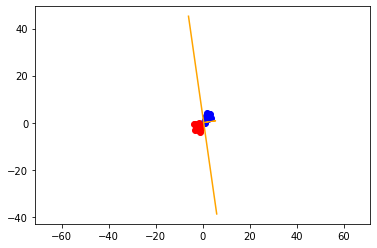

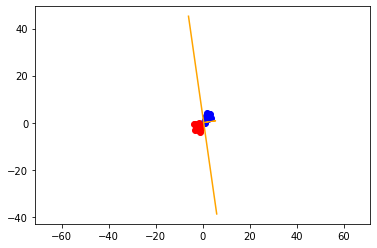

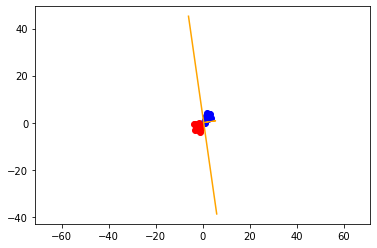

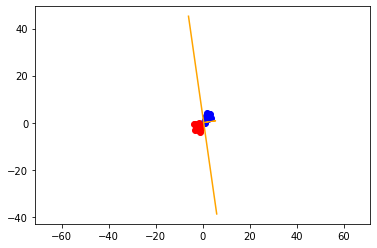

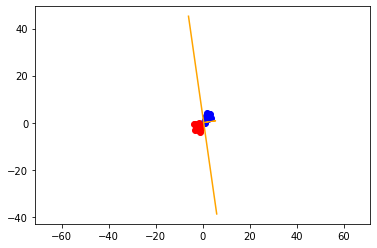

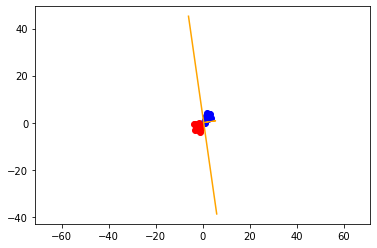

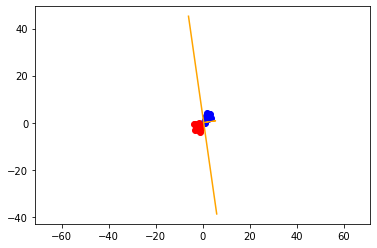

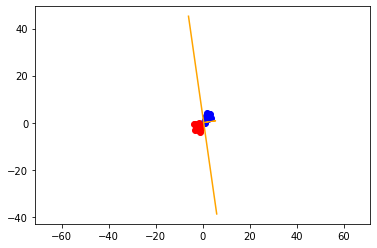

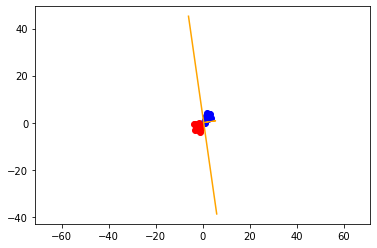

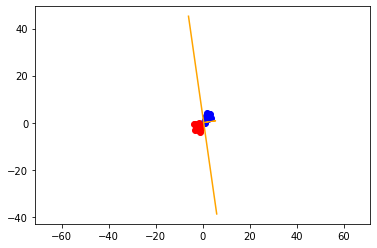

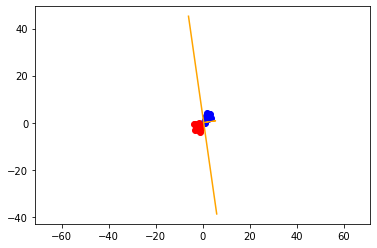

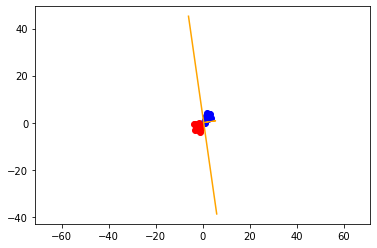

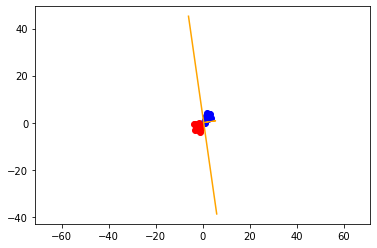

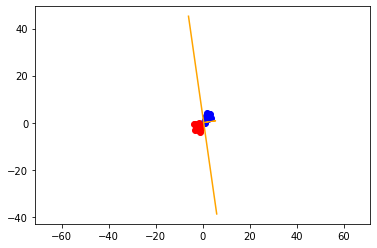

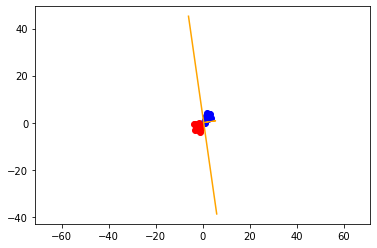

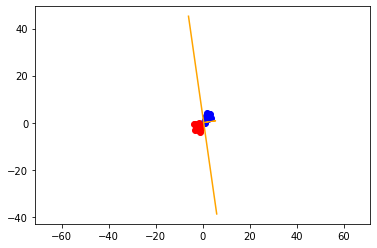

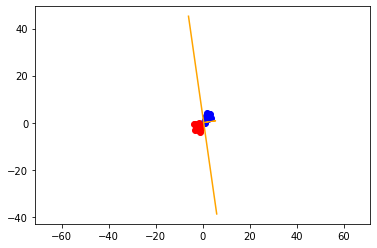

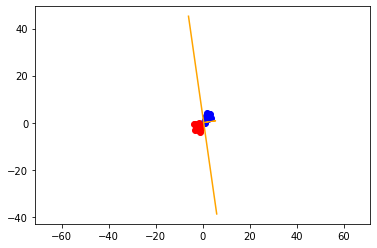

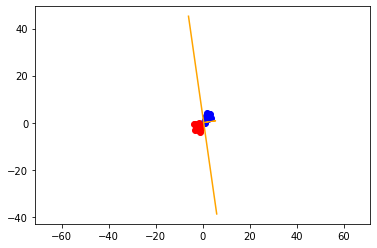

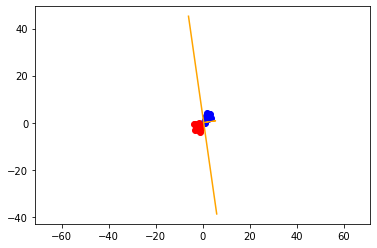

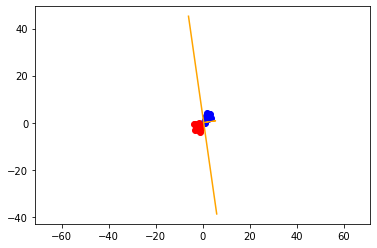

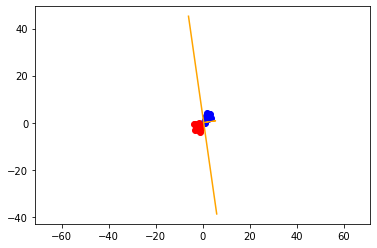

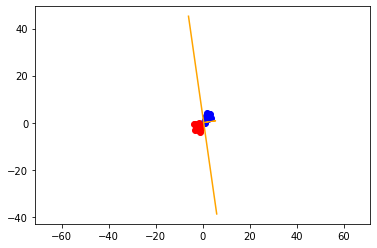

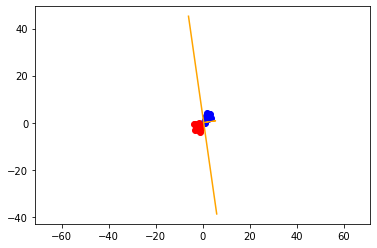

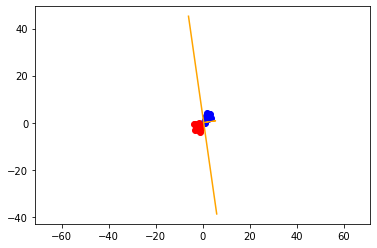

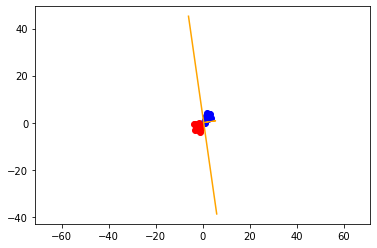

loss = 10.334909438144434


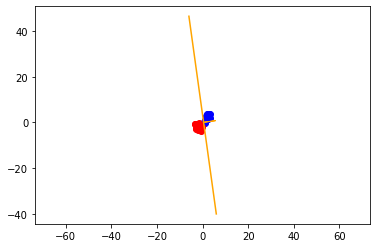

In [68]:
# generate data
X, y = generate_data()
stochastic_gradient_descent(X, y, 0.5, 15)